# Breast Cancer Wisconsin (Diagnostic) 
This is my first kernel on kaggle , I hope this kernel will  be helpful 

>[Breast Cancer Wisconsin (Diagnostic)](#scrollTo=hndBHlM9zBNY)

>[Exploratory Data Analysis](#scrollTo=Y7Hoah7Qzr9e)  

>>[Load Libraries](#scrollTo=VMiGkUAR0yke)

>>[Load Data](#scrollTo=78nQ3i230vZN)

>>[Data cleaning](#scrollTo=1k2un17s1imZ)

>>[Are there outliers?](#scrollTo=DeLC8yiWIez_)

>>[Correlation between features](#scrollTo=j0ar9UxxzIYz)

>[Feature engineering](#scrollTo=EWxSUWbkqzEU)

>>[What are the most important features](#scrollTo=Ph5LJxBaZCPG)

>>[PCA,TSE, Visualizziamo il dataset](#scrollTo=cq6t-EbPtv_k)

>[Classification](#scrollTo=s-BrG81hz8XX)

>>[Plotting functions](#scrollTo=0y6zRuG8BMDZ)

>>[LogisticRegression](#scrollTo=hIGngCe0BzWU)

>>[K-Nearest Neighbor](#scrollTo=-AlWlgU3rYku)

>>[Random Forest](#scrollTo=q62LTQISuCFE)

>>[Support Vector - linear](#scrollTo=EdK6pp23wCna)

>>[SVM - rbf](#scrollTo=yjCVaYwmy-zG)

>>[Support Vector - polynomial](#scrollTo=-jbfWrkC1ISR)

>>[AdaBoostClassifier](#scrollTo=cbWIjC7f25cB)

>>[Bagging](#scrollTo=sW2L1pNT8Qxp)

>>[Neural Network](#scrollTo=PiLDKoNZ-nSf)

>>[Ranking](#scrollTo=AuSn2_Opz94T)

>[Clustering](#scrollTo=ljq5av_2z_xS)

>>[Hierarchical clustering](#scrollTo=CZ-Sz2QK0Xr4)

>>>[Functions Utils](#scrollTo=F6h0d_7A5NXW)

>>>[Linkage functions.](#scrollTo=8Ty9jfTC5u2M)

>>>[Ward Linkage K = 2](#scrollTo=iiBcdEzW0pia)

>>>[Ward K=3 (Elbow Method)](#scrollTo=8i88Cxve1pFk)

>>[K Meas](#scrollTo=0RtwOd1Q2AHS)

>>>[Silhouette analysis](#scrollTo=7hcPAb4_2LBS)



# Exploratory Data Analysis

**Description of the Dataset.**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 
![alt text](http://thenurseszone.com/wp-content/uploads/2017/03/Breast-Biopsy-2.jpg)

This dataset is also available via the ftp server UW CS: http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/

Attributes information:
* ID number
* Diagnosis (M = malignant, B = benign)





![alt text](http://img.technews.tw/wp-content/uploads/2013/07/fna-benign1.png)
![alt text](http://img.technews.tw/wp-content/uploads/2013/07/fna-malignant1.png)

Ten characteristics with true values are calculated for each cell nucleus:
* Radius (Average of distances from center to points on the perimeter)
* Consistency (standard deviation of grayscale values)
* Perimeter
* Smoothness (local variation in radius lengths)
* Compactness (perimeter ^ 2 / area - 1.0)
* Concavity (severity of the concave parts of the contour)
* Concave points (number of concave parts of the contour)
* Symmetry
* fractal dimension ('coastline approximation' - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant


## Load Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import seaborn as sns 

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics 

#colab
#from google.colab import files

from sklearn.decomposition import PCA,KernelPCA # Principal Component Analysis module
from sklearn.manifold import TSNE, MDS # TSNE module

## Load Data 

In [3]:
#uploaded = files.upload()

#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))

In [4]:
df = pd.read_csv("../input/data.csv",header = 0)
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

## Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Delete the unuseful columns : 'id' and 'Unnamed: 32' (it is empty) are not needed for the data analysis.

In [6]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
print('Are there null values? ',df.isnull().values.any())


Are there null values?  False


There aren't null values! let's see the number of samples in the two classes and the percentages

Number of Benign	:	  357
Number of Malignant	:	  212
Percentage Benign	:	  62.74 %
Percentage Malignant	:	  37.26 %


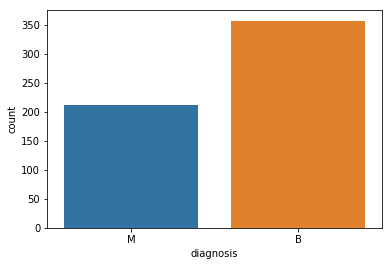

In [7]:
sns.countplot(df['diagnosis'],label="Count")    
B, M = df['diagnosis'].value_counts()

print('Number of Benign\t:\t ',B)
print('Number of Malignant\t:\t ',M)
print('Percentage Benign\t:\t % 2.2f %%' % (B/(B+M)*100))
print('Percentage Malignant\t:\t % 2.2f %%' % (M/(B+M)*100))

In [8]:
df_features = df[df.columns[1:31]]
y =   df[df.columns[0]]
df_features.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean           ...             \
count     569.000000              569.000000           ...              
mean        0.181162                0.062798           ...              
std         0.027414                0.007060           ...              
min         0.106000                0.049960           ...              
25%         0.161900                0.057700           ...              
50%         0.179200                0.061540           ...              
75%         0.195700                0.066120           ...              
max         0.304000                0.097440           ...              

       radius_worst  texture_worst  perimeter_worst   area_worst  \
count    569.000000     569.000000       569.000000   569.000000   
mean      16.269190      25.677223       107.261213   880.583128   
std        4.833242       6.146258        33.602542   569.356993   
min        7.930000      12.020000        50.410000   185.200000   
25%       13.010000      21.080000        84.110000   515.300000   
50%       14.970000      25.410000        97.660000   686.500000   
75%       18.790000      29.720000       125.400000  1084.000000   
max       36.040000      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 30 columns]

## Are there outliers?
After a StandardScaler,  in order to easily compare the data, I want to determine if there are any outliers in the data set.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features =scaler.fit_transform(df_features.values)
df_features_scaled = pd.DataFrame(scaled_features, index=df_features.index, columns=df_features.columns)


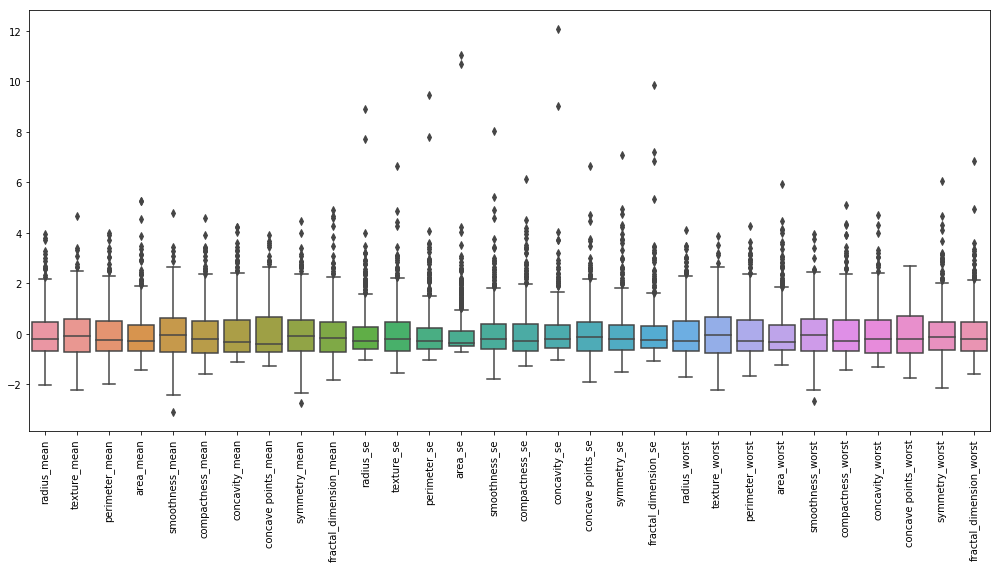

In [13]:
# ci sono outlier?

plt.figure(figsize=(14,8))
sns.boxplot( data = df_features_scaled )
plt.xticks(rotation=90)  

plt.tight_layout()

A robust statistical approach would have considered outliers all the values plotted over the value 3 (or 2.5) on the y axis. 
however, given the limited range of data distribution (from about -2.5 to about +11) and the availability of data is not very high (only 569 observations), it has been preferred to use an "visual" approach for detection (based on density of the points above a specific threshold) and remotion  the outliers.I consider only the observations plotted under  the 6 value  (very far from the mean).

Note. Outliers could be indicative of incorrect data, erroneous procedures or experimental areas where some theories may not be valid
Before removing them we should discuss with domino experts to understand why these points are not valid (for example, the measuring equipment failed, the measurement method was unreliable for some reason, there were contaminants, etc ... ).


https://onlinelibrary.wiley.com/doi/pdf/10.1002/widm.2

(557, 30)


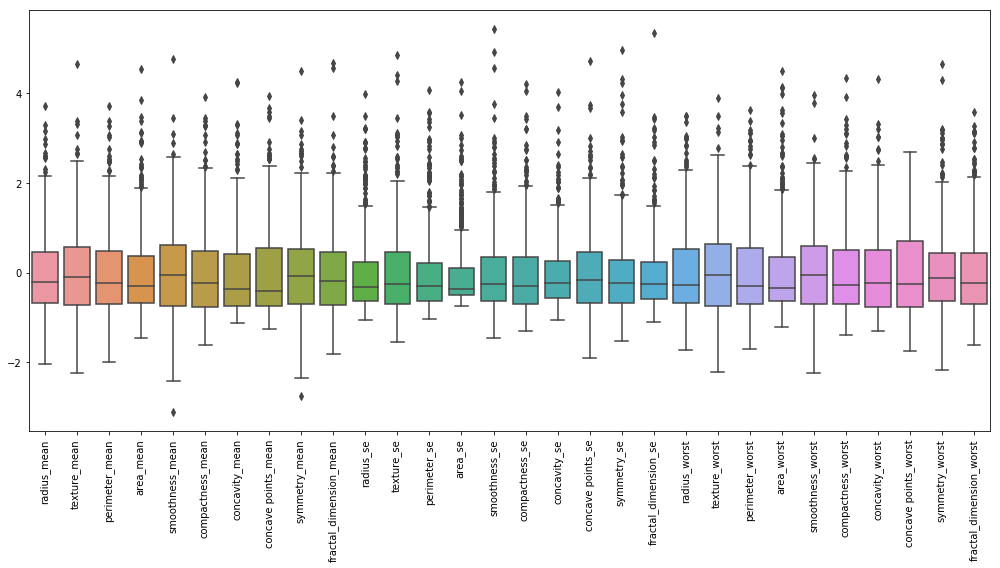

In [15]:
df_features_clean=df_features_scaled[df_features_scaled.apply(lambda x: np.abs(x - x.mean()) / x.std() < 6).all(axis=1)]
print(df_features_clean.shape)
plt.figure(figsize=(14,8))
sns.boxplot( data = df_features_clean )
plt.xticks(rotation=90)  
plt.tight_layout()


Number of Malignant              :  212
Number of Benign                 :  357
Number of Malignant              :  37.26 %
Number of Benign                 :  62.74 %
Number of Malignant (no outliers):  205
Number of Benign    (no outliers):  352
Number of Benign    (no outliers):  63.20 %
Number of Malignant (no outliers):  36.80 %


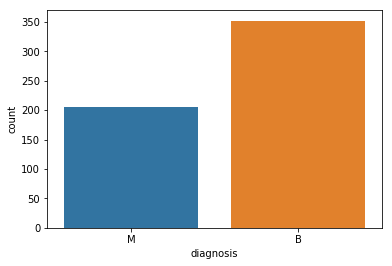

In [16]:
#############################
df_features_y_clean = pd.concat([df_features_clean, y], axis=1, join_axes=[df_features_clean.index])
#################################
df_features_clean = df_features_y_clean.iloc[:,0:30]
df_y = df_features_y_clean.iloc[:,30]

B, M = df['diagnosis'].value_counts()   
B_c, M_c = df_features_y_clean['diagnosis'].value_counts()
sns.countplot(df_features_y_clean['diagnosis'],label="Count")    

print('Number of Malignant              : ',M)
print('Number of Benign                 : ',B)
print('Number of Malignant              : % 2.2f %%' % (M/(B+M)*100))
print('Number of Benign                 : % 2.2f %%' % (B/(B+M)*100))
print('Number of Malignant (no outliers): ',M_c)
print('Number of Benign    (no outliers): ',B_c)
print('Number of Benign    (no outliers): % 2.2f %%' % (B_c/(B_c+M_c)*100))
print('Number of Malignant (no outliers): % 2.2f %%' % (M_c/(B_c+M_c)*100))


After  removing of the outliers, the dataset is composed as follows:

Total observations of the dataset: 557;

Malignant Class: 205;

Benign Class: 352.

The proportion is maintained

## Correlation between features

We study the correlation dividing the features into three groups: (The mean, standard error and "worst" or largest )

In [19]:
df_features_mean= df_features[df_features.columns[0:10]]
df_features_se= df_features[df_features.columns[10:20]]
df_features_worst = df_features[df_features.columns[20:30]]

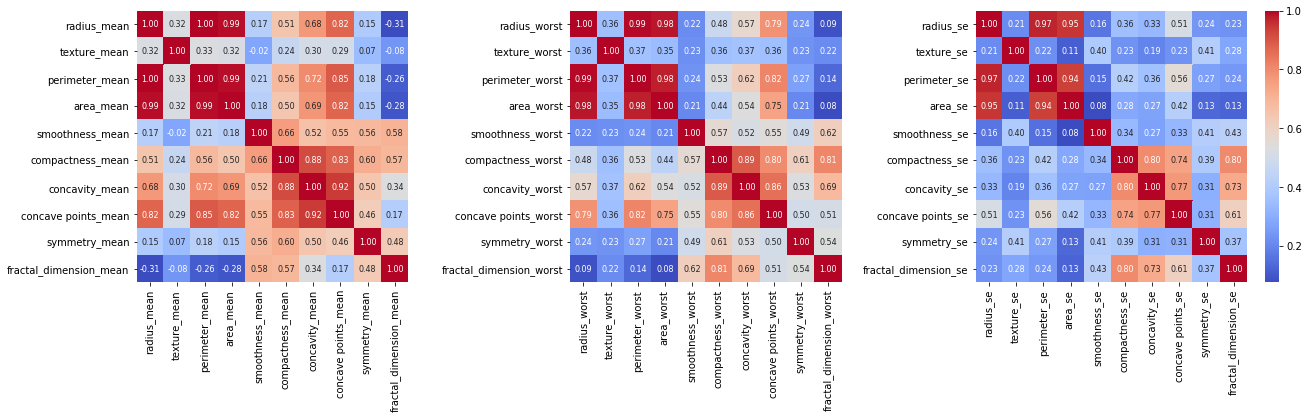

In [20]:
plt.figure(figsize=(22,5))
plt.subplot(1, 3, 1)
sns.heatmap( df_features_mean.corr(), cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},cmap= 'coolwarm')
plt.subplot(1, 3, 2)
sns.heatmap(df_features_worst.corr(), cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},cmap= 'coolwarm')
plt.subplot(1, 3, 3)
sns.heatmap(df_features_se.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},cmap= 'coolwarm')

radius, area and perimeter (mean, the wrost, and the error standard) are closely correlated to each other, the same for   the characteristics of compactness, concave points and concavity.


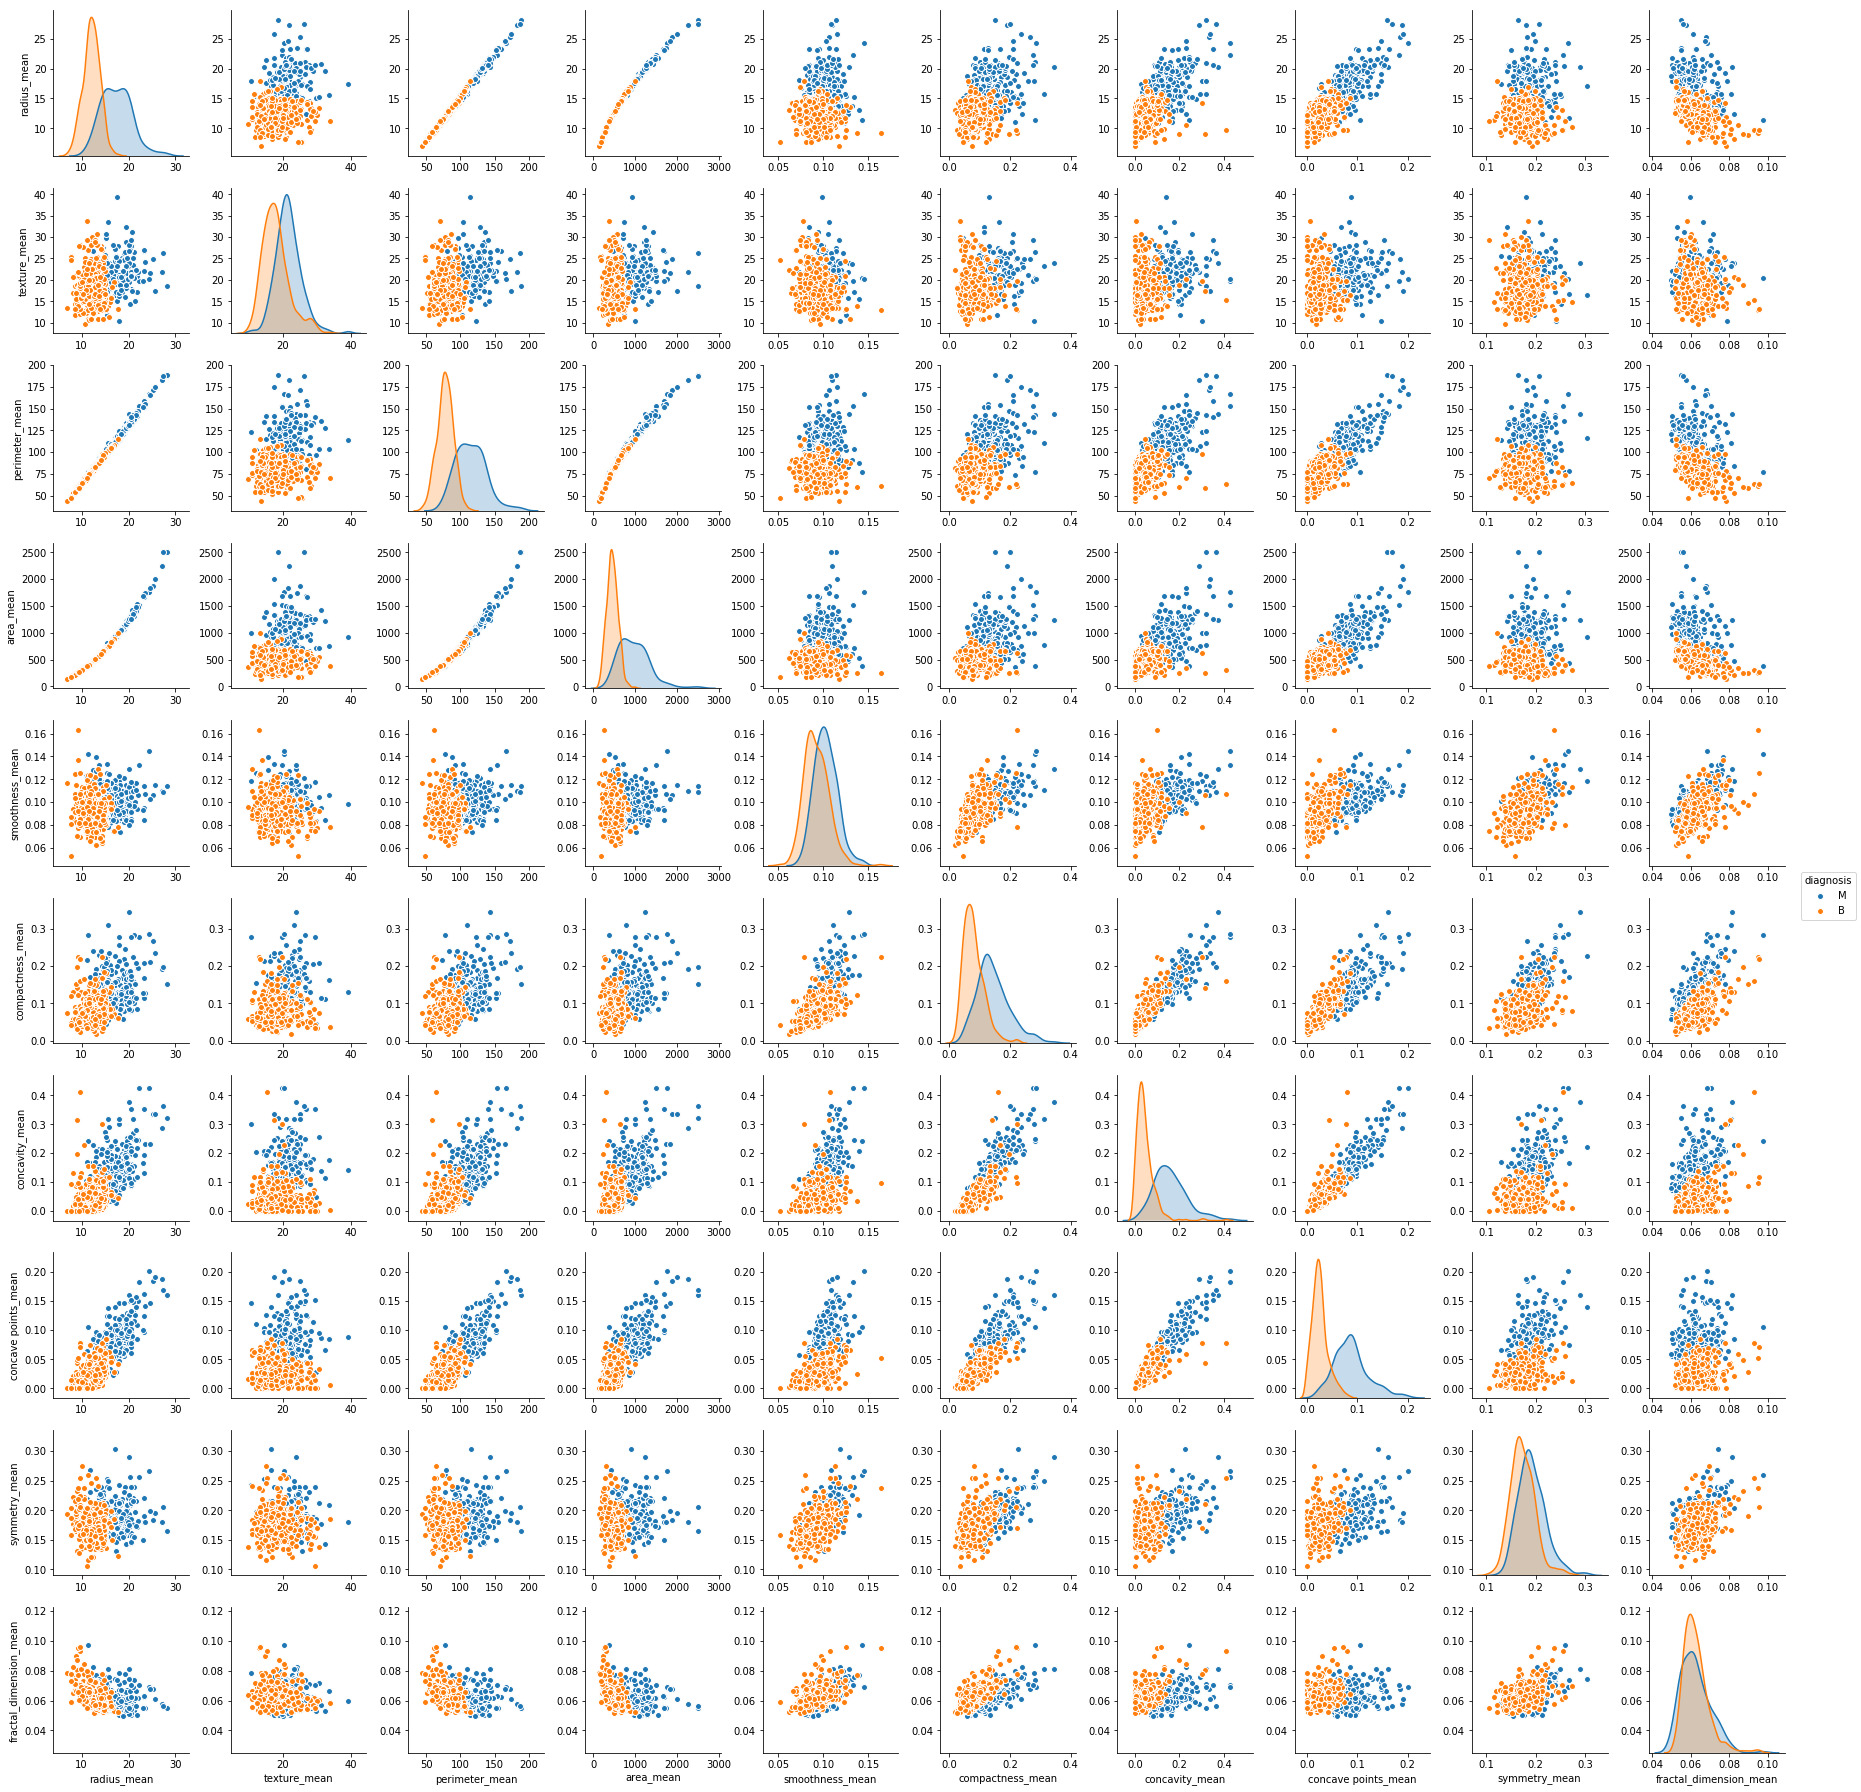

In [21]:

sns.pairplot(  pd.concat([df_features_mean,y], axis=1),  hue='diagnosis', diag_kind="kde",diag_kws=dict(shade=True))
# sns.pairplot(  pd.concat([df_features_se,y], axis=1),    hue='diagnosis', diag_kind="kde",diag_kws=dict(shade=True))
# sns.pairplot(  pd.concat([df_features_worst,df_y], axis=1), hue='diagnosis', diag_kind="kde",diag_kws=dict(shade=True))





Observations: The radius, area and perimeter characteristics are closely related and have higher values and binomial distribution. In malignant tumors, the benign tumors have smaller cell nuclei and Gausssian distribution. HWHM is bigger in the class of malignants, but broadening is narrower in the benign

In [24]:
# I change the order to better compare
order_cols = ['radius_mean', 'radius_se', 'radius_worst',
 'texture_mean', 'texture_se', 'texture_worst',
 'perimeter_mean', 'perimeter_se', 'perimeter_worst',
 'area_mean','area_se','area_worst',
 'smoothness_mean', 'smoothness_se', 'smoothness_worst',
 'compactness_mean', 'compactness_se', 'compactness_worst',
 'concavity_mean', 'concavity_se', 'concavity_worst',
 'concave points_mean','concave points_se','concave points_worst',
 'symmetry_mean', 'symmetry_se', 'symmetry_worst',
 'fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst','diagnosis']
df_features_y_clean = df_features_y_clean[order_cols]


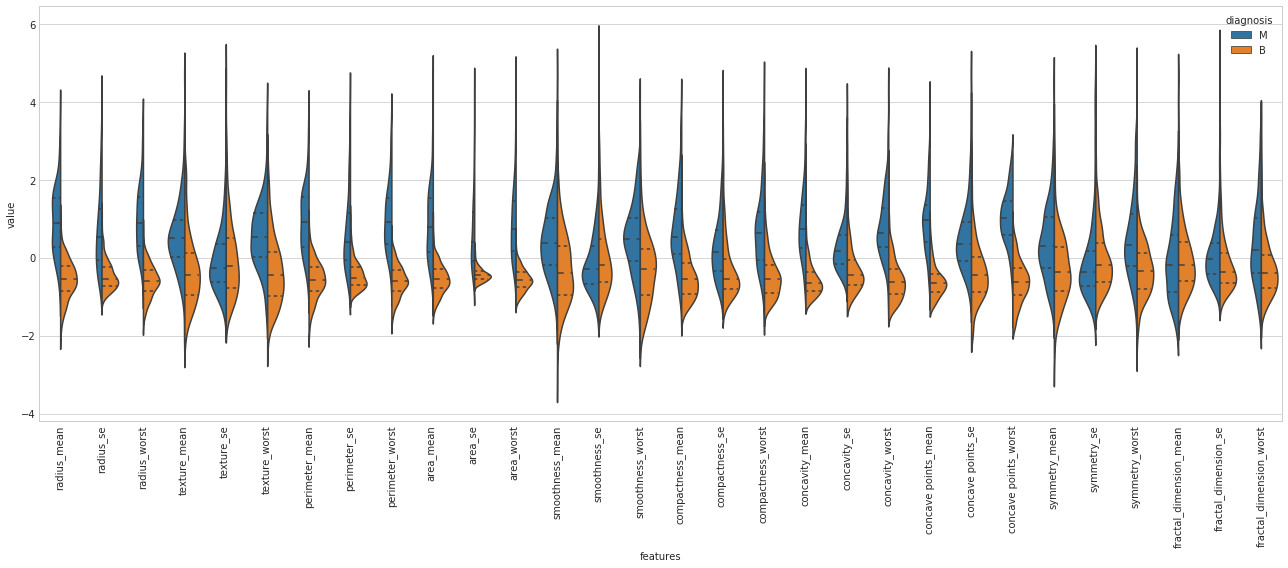

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,8))
data = pd.melt(df_features_y_clean,id_vars="diagnosis",var_name="features", value_name='value')
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90) 
plt.tight_layout()


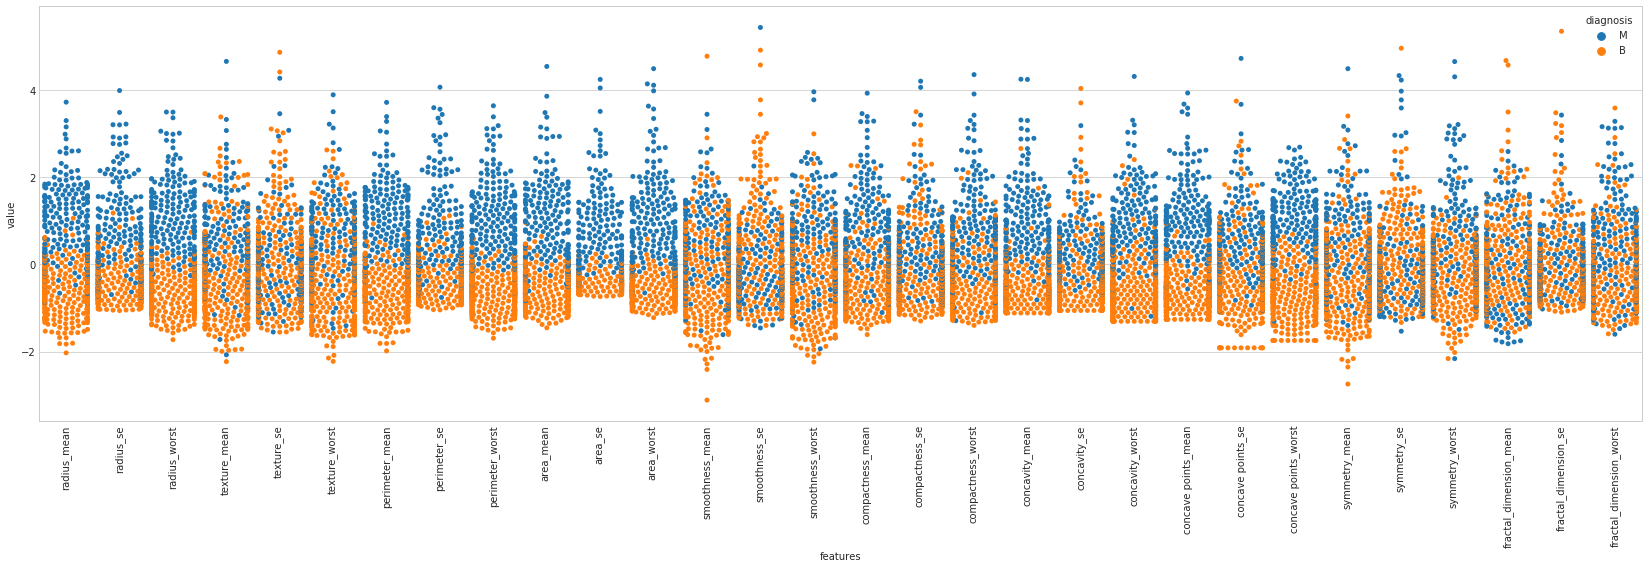

In [26]:
plt.figure(figsize=(23,8))
data = pd.melt(df_features_y_clean,id_vars="diagnosis",var_name="features", value_name='value')
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90) 
plt.tight_layout()

#  Feature engineering
I proceeded to select the features that are most discriminating (see swarmplot) among the most correlated features (see correlation plot). the following considerations were therefore made, 

* from  the correlated group [compactness_se, concavity_se  concave pointsse], I select **compactness_se**.
* from the correlated group [compactness_worst, concavity_worst and concave], I select points_worst **concavity_point_worst**)
* rom the correlated group [concavity_mean, compactness_mean, concavity_mean and concave points_mean] , I select **concavity_mean**)
* from the correlated group [radius_worst, area_worst, perimeter_worst, radius_worst ] , I select **radius_worst**)
* from the correlated group [perimeter_mean, area_mean, perimeter_mean, radius_mean ]  , I select **perimeter_worst**)
* from the correlated group [area_se, area_se, perimeter_se, radius_se]  , I select **area_se**)

In [30]:
my_selected_features = ['compactness_se', 
                        'radius_worst', 'perimeter_mean', 'area_se',
                         'texture_mean', 'texture_se', 'texture_worst',
                        'concavity_mean', 'concavity_se', 'concavity_worst', 'concave points_mean','concave points_se','concave points_worst', 
                        'symmetry_mean', 'symmetry_se', 'symmetry_worst', 'fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']
df_my_selected_features = df_features_clean[my_selected_features]

Although still under data exploration, once our dataset was simplified, it was already possible to obtain useful information.
Therefore, a decision tree was created (depth 4 and Gini criterion), from the observation of which it was possible to make some important considerations.

In [31]:
!pip install graphviz
!apt-get -qq install -y graphviz && pip install pydot

  Retrying (Retry(total=4, connect=None, read=None, redirect=None)) after connection broken by 'NewConnectionError('<pip._vendor.requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x750e9a512978>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',)': /simple/pydot/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None)) after connection broken by 'NewConnectionError('<pip._vendor.requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x750e9a512940>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',)': /simple/pydot/
  Retrying (Retry(total=2, connect=None, read=None, redirect=None)) after connection broken by 'NewConnectionError('<pip._vendor.requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x750e9a512898>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',)': /simple/pydot/
  Retrying (Retry(total=1, conn

In [34]:
from sklearn import tree
import graphviz 

def plot_decision_tree(model, columns):
    dot_data = tree.export_graphviz(model, out_file=None, 
                             feature_names=columns,  
                             class_names=['Malignant','Benign'],  
                             filled=False, rounded=True,  
                             special_characters=False)  
    graph = graphviz.Source(dot_data)  
    return graph 
  
    
def plot_importances_features(model, columns):
  indices = np.argsort(model.feature_importances_)[::-1]
  feat_imp = pd.DataFrame({'Feature':columns.values[indices],
                        'Feature ranking':model.feature_importances_[indices]})
  plt.rcParams['figure.figsize']=(8,12)
  sns.set_style('whitegrid')
  ax = sns.barplot(x='Feature ranking', y='Feature', data=feat_imp)
  ax.set(xlabel='Feature ranking')
  plt.show()


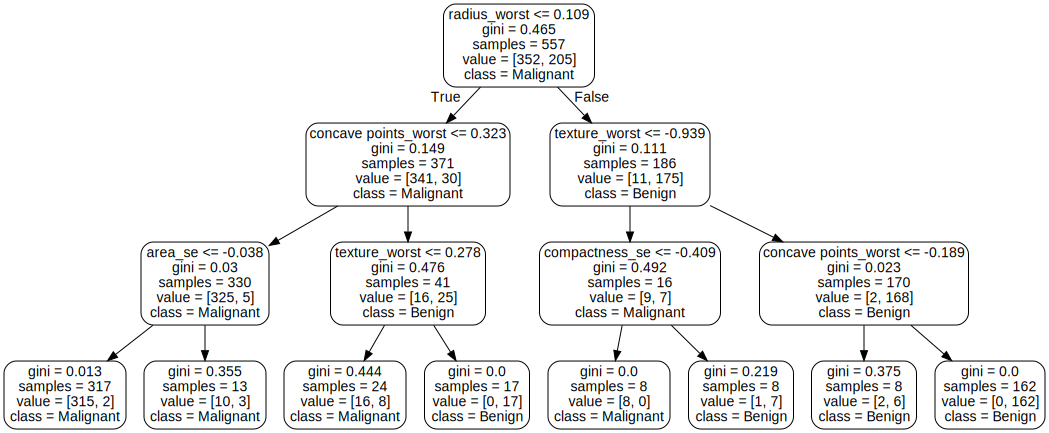

In [35]:
 # vediamo l'albero con le mie features
clf1 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=8)  
clf1.fit(df_my_selected_features.values, df_y.values)
plot_decision_tree(clf1,my_selected_features)



the first consideration to make is that, as we hypothesized, the size of the nucleus is very discriminating for the purposes of classification;

In the decision tree, you can see the role of individual features in discriminating tumors.


## What are the most important features

Random Forests are often used for feature selection in a data science workflow. 

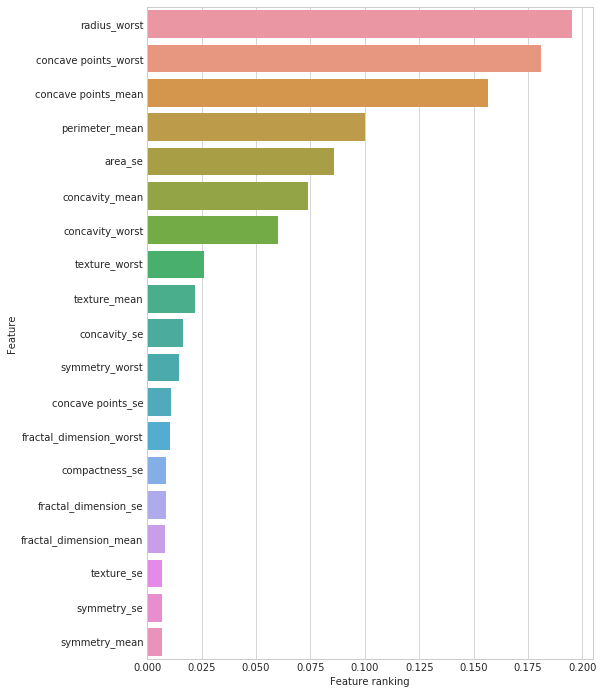

In [37]:
model = RandomForestClassifier(n_estimators=1000)
#Fit the model:
model.fit(df_my_selected_features.values, df_y.values)
plot_importances_features(model,df_my_selected_features.columns) # on my_selected_features


the most important features for reduced dataset are: radius_worst, concave points_worst,radius_worst,concave points_mean, perimeter_mean, concavity_mean.

let's see the most important features on the whole dataset:



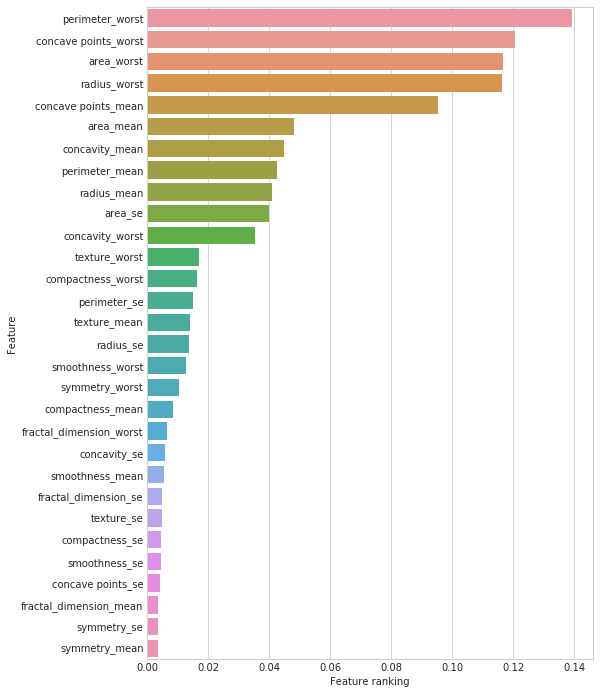

In [38]:
model = RandomForestClassifier(n_estimators=1000)
#Fit the model:
model.fit(df_features_clean.values, df_y.values) 
plot_importances_features(model, df_features.columns)

The most important features are: perimeter_worst, area_worst, concave points_worst, radius_worst,concave points_mean 


## PCA,TSE, MDS Dimensionality Reduction

Why is dimensionality reduction useful? 
* Too many variables can cause such problems below
* Increased computer throughput
* Too complex visualization problems
* Decrease efficiency by including variables that have no effect on the analysis
* Make data interpretation difficult

Continuing the exploratory process aimed at understanding how to simplify the dataset, without losing relevant information, the following processes were applied: PCA, Cosine PCA, TSNE and MDS, which are techniques for reducing complexity; in particular:

*  PCA (Principal Component Analysis) is based on two basic considerations: high correlation between variables indicates redundancy in the data; the most important variables express higher variance. Based on these considerations, the model simplifies the complexity of the variables;
* TSNE (T-distributed Stochastic Neighbor Embedding) is a non-linear dimensionality reduction technique that is particularly suited to reducing the complexity of multidimensional datasets in a two- or three-dimensional model;
* MDS (MultiDimensional Scaling) is a statistical analysis technique often used to graphically show differences or similarities between elements of a collection. Starting from a square matrix, containing the "similarity" of each row element with each column element, the multidimensional scaling algorithm assigns each element a position in a N-dimensional space, with N established a priori. This technique therefore starts with a system as large as the elements of the system, and reduces the dimensions by up to a certain number.




In [40]:
# Turn dataframe into arrays
X = df_features_clean.values

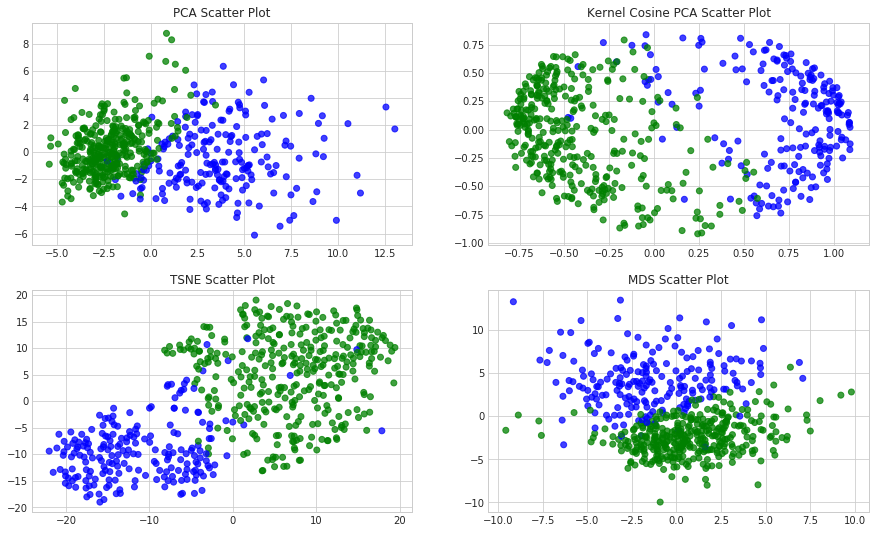

In [41]:
# Invoke the PCA method. Since this is a binary classification problem
# let's call n_components = 2
pca_2d = PCA(n_components=2)
pca_2d_results = pca_2d.fit_transform(X)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X)

pca_cos_2d = KernelPCA(n_components=2, kernel = 'cosine')
pca_cos_2d_results = pca_cos_2d.fit_transform(X)


mds = MDS(2, max_iter=100, n_init=1)
mds_results = mds.fit_transform(X)

# Plot the TSNE and PCA visuals side-by-side
cmap = {'B':'green','M':'blue'}
fig = plt.figure(figsize = (15,9))


plt.subplot(2, 2, 1)
plt.title('PCA Scatter Plot')
plt.scatter( pca_2d_results[:,0], pca_2d_results[:,1], c = [cmap[x] for x in df_y.values] ,alpha=0.75)

plt.subplot(2, 2, 2)
plt.title('Kernel Cosine PCA Scatter Plot')
plt.scatter( pca_cos_2d_results[:,0], pca_cos_2d_results[:,1], c =[cmap[x] for x in df_y.values] ,alpha=0.75)

plt.subplot(2, 2, 3);
plt.title('TSNE Scatter Plot')
plt.scatter(tsne_results[:,0], tsne_results[:,1],  c =[cmap[x] for x in df_y.values] , alpha=0.75)


plt.subplot(2, 2, 4)
plt.title('MDS Scatter Plot')
plt.scatter(mds_results[:,0], mds_results[:,1],  c =[cmap[x] for x in df_y.values] , alpha=0.75)

plt.show()

From a first observation of the results of the plots, it can be deduced that the data are linearly separable and therefore a linear model could be an excellent solution to solve a classification problem.


**In the PCA, the next question is “how many principal components are we going to choose for our new feature subspace?

Another question that arose was how many main components we should have chosen for our new function subspace. Usually, in order to identify the number of components to be used, we try to follow the two criteria together.

According to the first criterion, a number of principal components must be considered such that they take into account a sufficiently high percentage of total variance (at least 70%, for example). When defining the minimum percentage of acceptable variance, the number of original variables should be taken into account, so that as the number of variables increases, a lower percentage of explained variance may be accepted.





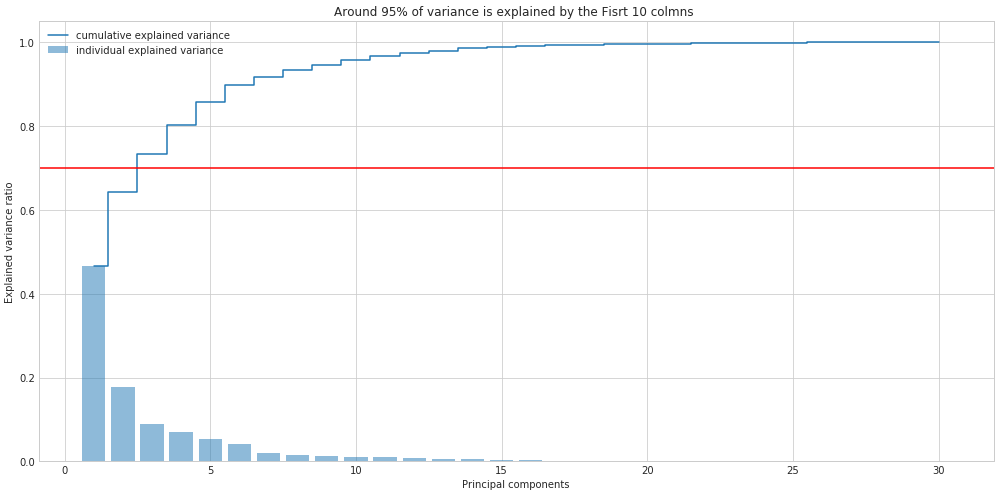

In [42]:
"""e next question is “how many principal components are we going to choose for our new feature subspace?” 
A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues.
The explained variance tells us how much information (variance) can be attributed to each of the principal components."""
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)


with plt.style.context('seaborn-whitegrid'):
    plt.figure(1, figsize=(14, 7))
    plt.bar(range(1,31,1), pca.explained_variance_ratio_, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(1,31,1),pca.explained_variance_ratio_.cumsum(), where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.title("Around 95% of variance is explained by the Fisrt 10 colmns ");
    plt.legend(loc='best')
    plt.axhline(y=0.7, color='r', linestyle='-')
    plt.tight_layout()

The second criterion uses a graph called scree-graph of eigenvalues as a function of the number of principal components. As the eigenvalues are decreasing, the graph takes the form of a broken graph with always negative slope. Analyzing the graph it will be possible to notice a point in which a sudden variation of slope occurs, in correspondence with which the number k of principal components to consider is identified. 


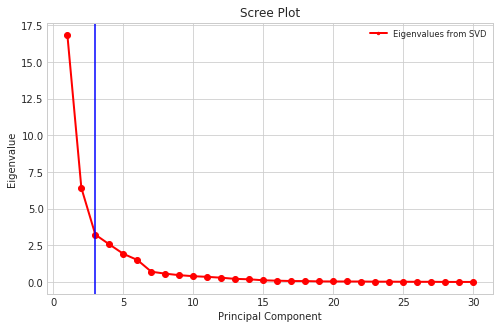

In [43]:
sns.set_style('whitegrid')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Make a random array and then make it positive-definite
num_vars = 30


A = X
U, S, V = np.linalg.svd(X) 
eigvals = S**2 / np.cumsum(S)[-1]

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.axvline(x=3, color='b', linestyle='-')
plt.show()

A good  number of principal component is 3 with the explained variance of 74%

In [44]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print ("Features by importance:\n", important_features)
    return important_features



No, I want to know what are the most import features for PCA


In [45]:
pca = PCA(n_components=2, svd_solver='full')
pca_2d_results = pca.fit_transform(X)

components = pd.DataFrame(pca.components_ , columns = df_features.columns, index=[1, 2])

important_features = get_important_features(pca_2d_results, pca.components_, df_features.columns.values)


Features by importance:
 [(3.703010483492352, 'radius_worst'), (3.688424241525173, 'perimeter_worst'), (3.641428253594207, 'radius_mean'), (3.625058328268553, 'perimeter_mean'), (3.577575194586405, 'area_worst'), (3.549625788660233, 'area_mean'), (3.513816699244312, 'concave points_mean'), (3.4730458401543878, 'compactness_mean'), (3.4473451813814955, 'concave points_worst'), (3.429312447995222, 'fractal_dimension_mean'), (3.3729628284133555, 'concavity_mean'), (3.1068108830239036, 'concavity_worst'), (3.068947321335464, 'compactness_worst'), (2.948767043635934, 'fractal_dimension_worst'), (2.803193153354082, 'smoothness_mean'), (2.7213546794417516, 'compactness_se'), (2.596432580409782, 'symmetry_mean'), (2.595405241368178, 'smoothness_worst'), (2.5385869870929647, 'perimeter_se'), (2.5306446740264157, 'radius_se'), (2.491796514885087, 'concave points_se'), (2.4874799351532335, 'area_se'), (2.3495246841474815, 'fractal_dimension_se'), (2.1149439019093648, 'smoothness_se'), (2.07863043

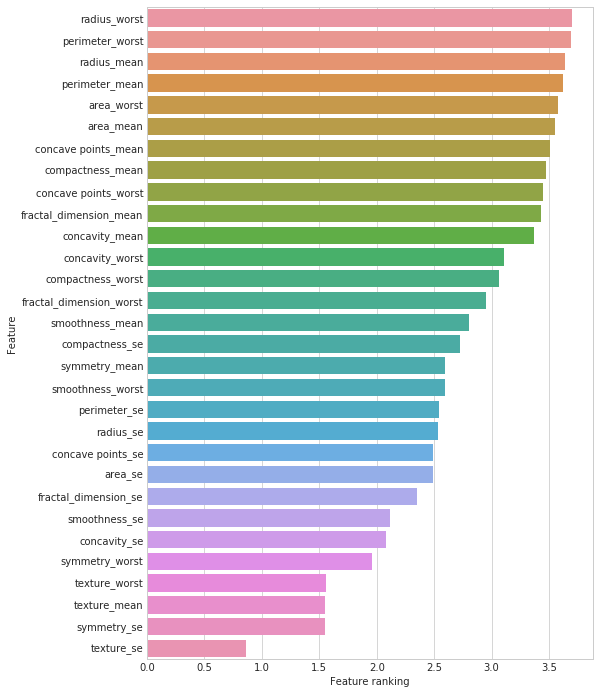

In [46]:
r,f = zip(*important_features)

feat_imp = pd.DataFrame({'Feature':f,
                        'Feature ranking':r})
plt.rcParams['figure.figsize']=(8,12)
sns.set_style('whitegrid')
ax = sns.barplot(x='Feature ranking', y='Feature', data=feat_imp)
ax.set(xlabel='Feature ranking')
plt.show()

   This funtion will project your *original* features
    onto your principal component feature-space, so that you can
    visualize how "important" each one was in the
    multi-dimensional scaling

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def draw_vectors(transformed_features, components_, columns, lenght):
    """
    This funtion will project your *original* features
    onto your principal component feature-space, so that you can
    visualize how "important" each one was in the
    multi-dimensional scaling
    """
    
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ax = plt.axes()

    for i in range(num_columns):
    # Use an arrow to project each original feature as a
    # labeled vector on your principal component axes
        if math.sqrt(xvector[i]**2 + yvector[i]**2) >lenght: # solo vettori maggiori di lenght
          plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
          plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.45)

    return ax

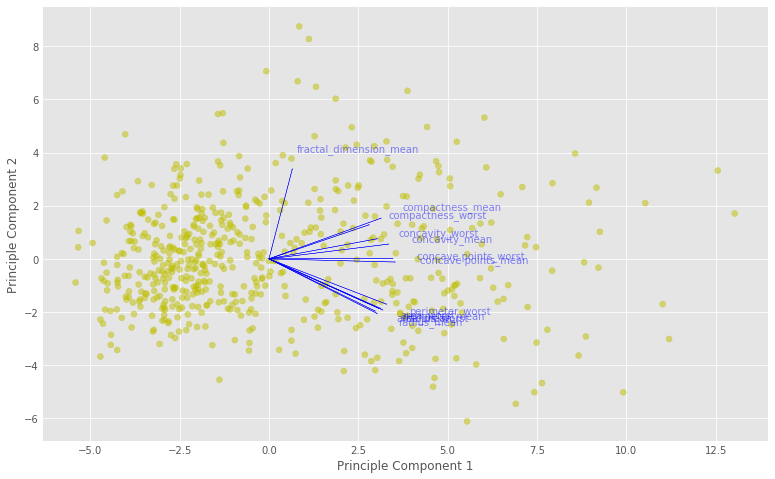

In [49]:
plt.figure(figsize=(13,8))


ax = draw_vectors(pca_2d_results, pca.components_, df_features.columns.values,3.0)
#ax.set_ylim([-3,-1])

T_df = pd.DataFrame(pca_2d_results)
T_df.columns = ['component1', 'component2']

T_df['color'] = 'y'


plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.scatter(T_df['component1'], T_df['component2'], color=T_df['color'], alpha=0.5)
plt.show()

The most important features for PCA are: radius worst, perimeter worst, perimeter mean, radius mean and area worst


# Classification

This section will describe the procedures and the various models used for the classification the type of tumor.
In particular, after having divided the data into two set (70%/30% for the training and testing) for each model I analyzed:
-	the validation curve plot the influence of a single hyperparameter on the training score and the validation score to find out whether the estimator is overfitting or underfitting for some hyperparameter values. If the training score and the validation score are both low, the estimator will be underfitting. If the training score is high and the validation score is low, the estimator is overfitting and otherwise it is working very well [http://scikit-learn.org/stable/modules/learning_curve.html].
-	the learning curve that compares the performance of a model on training and testing data over a varying number of training instances [http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html] ;
-	I trained the model using the entire dataset (which we called Real Data) and a reduced dataset composed of 3 principal component (which we called PCA 3D)
-	 Boundary Line and Boundary Line Probabilistic, illustrate the nature of decision boundaries of different classifiers . [http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html]
-	the performance and validated the model with the Cross-Validation. 
Finally I plot Receiver Operating Characteristic (ROC) metric to evaluate classifier output quality [http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html].

In the medical field, the value of Recall is considered a primary value, as the goal is to identify all cases of really positive (malignant tumor) minimizing false negative (e.g. I predict benign tumor but the patient has a malignant tumor). In our case the malignant M tumors have positive class and those benign B negative class.


In [50]:
#Learning curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import ListedColormap

from matplotlib import cm
from sklearn.decomposition import PCA,KernelPCA # Principal Component Analysis module


df_features = df_features_clean
y = df_y
# 70/30 
y = df_y.map({'M':1,'B':0})
x_train, x_test, y_train, y_test = train_test_split(df_features.values,y.values, test_size = .3, stratify =y, random_state=34)

#70/30 cross validation
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=34)

## Plotting functions

Here, I defined some functions to evaluate the performance of a choosen model (roc_curve_model, validation_curve_model,learning_curve_model,scores_plot, boundaryline, plot_confusion_matrix)

In [51]:

#validation curve
def validation_curve_model(X, Y, model, param_name, parameters, cv, ylim, log=True):

    train_scores, test_scores = validation_curve(model, X, Y, param_name=param_name, param_range=parameters,cv=cv, scoring="accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
   

    plt.figure(figsize = (6,4))
    plt.title("Validation curve")
    plt.fill_between(parameters, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameters, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")

    if log==True:
        plt.semilogx(parameters, train_scores_mean, 'o-', color="r",label="Training score")
        plt.semilogx(parameters, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    else:
        plt.plot(parameters, train_scores_mean, 'o-', color="r",label="Training score")
        plt.plot(parameters, test_scores_mean, 'o-', color="g",label="Cross-validation score")

    if ylim is not None:
        plt.ylim(*ylim)

    plt.ylabel('Score')
    plt.xlabel('Parameter '+param_name)
    plt.legend(loc="best")
    
    return plt
  
# Learning curve
def learning_curve_model(X, Y, model, cv, train_sizes, ylim):

    plt.figure(figsize = (6,4))
    plt.title("Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")


    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    if ylim is not None:
        plt.ylim(*ylim)                  
    plt.legend(loc="best")
    return plt

In [52]:
!pip install mlxtend #plot_confusion_matrix

In [53]:
from mlxtend.plotting import plot_confusion_matrix
# for visualization purpose
def BoundaryLine(kernel, algo, algo_name):
    reduction = KernelPCA(n_components=2, kernel = kernel)
    x_train_reduced = reduction.fit_transform(x_train)
    x_test_reduced = reduction.transform(x_test)
    
    classifier = algo
    classifier.fit(x_train_reduced, y_train)
    
    y_pred_reduced = classifier.predict(x_test_reduced)

    
    plt.figure(figsize = (14,6))
    plt.subplot(221)
    #Train set boundary
    X_set, y_set = x_train_reduced, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(( 'green','red')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c =  ListedColormap(( 'green','red'))(i), label = j)
        
    plt.title('{} Boundary Line with {} PCA (Train Set)' .format(algo_name, kernel))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    
    
    plt.subplot(222)
    #Test set boundary
    X_set, y_set = x_test_reduced, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(( 'green','red')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c =  ListedColormap(( 'green','red'))(i), label = j)
        
    plt.title('{} Boundary Line with {} PCA (Test Set)' .format(algo_name, kernel))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    
    
   
    
    plt.subplot(223)
    cmap  = cm.get_cmap('RdYlGn_r')
    
    
    x_min, x_max = x_train_reduced[:, 0].min() - .5, x_train_reduced[:, 0].max() + .5
    y_min, y_max = x_train_reduced[:, 1].min() - .5, x_train_reduced[:, 1].max() + .5
    X1, X2 = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
    
    
    Z = classifier.predict_proba(np.c_[X1.ravel(), X2.ravel()])[:, 1].reshape(X1.shape)

    plt.contourf(X1, X2, Z, cmap = cmap, alpha=.6)

    
    for i, j in enumerate(np.unique(y_train)):
      plt.scatter(x_train_reduced[y_train == j, 0], x_train_reduced[y_train == j, 1],
                  c =  ListedColormap(( 'green','red'))(i), label = j)

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
            
    plt.title('{} Boundary Line Proba with {} PCA (Train Set)' .format(algo_name, kernel))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    
    plt.subplot(224)
    plt.contourf(X1, X2, Z, cmap = cmap, alpha=.6)
    for i, j in enumerate(np.unique(y_test)):
      plt.scatter(x_test_reduced[y_test == j, 0], x_test_reduced[y_test == j, 1],
                  c =  ListedColormap(( 'green','red'))(i), label = j)
      
      

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
            
    plt.title('{} Boundary Line Proba with {} PCA (Test Set)' .format(algo_name, kernel))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    
    plt.tight_layout(pad=2.4, w_pad=2.5, h_pad=1.0)
    

In [54]:
from sklearn.metrics import roc_curve, auc


#roc curve_model
def roc_curve_model(model,x_test,y_test, algo_name=''):
  y_prob = model.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilitie
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
  roc_auc = auc(false_positive_rate, true_positive_rate)

  plt.figure(figsize=(5,5))
  plt.title('ROC '.format(algo_name))
  plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC '+algo_name+'= %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],linestyle='--')
  plt.axis('tight')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  
  return plt

def evaluate_cv(xvalues,yvalues, algo):
    scores = cross_val_score(algo, xvalues ,yvalues, cv=10) #accuracy
    scores_recall = cross_val_score(algo, xvalues,yvalues, cv=10,scoring='recall')
    scores_f1 = cross_val_score(algo, xvalues,yvalues, cv=10,scoring='f1')
    scores_average_precision= cross_val_score(algo,xvalues,yvalues, cv=10,scoring='average_precision')
    print("Cross validation score           : ",scores.mean())  #accuracy
    print("Cross validation recall          : ",scores_recall.mean()) 
    print("Cross validation f1 score        : ",scores_f1.mean())     
    print("Cross validation precision score : ",scores_average_precision.mean())
    
    return scores_recall, scores

  # plot Classifires' performances on real data and PCA 3D 
def evalute_realdata_PCAreduction(algo, algo_name,npca=3, plot_cf=False):
    reduction = PCA(n_components=npca) # in EDA we found that 3 PC is a good value
    x_train_reduced = reduction.fit_transform(x_train)
    x_test_reduced = reduction.transform(x_test)
    
   
    algo.fit(x_train_reduced, y_train)
    
    y_pred_reduced = algo.predict(x_test_reduced)
    
      
   
    roc_curve_model(algo,x_test_reduced,y_test,' PCA' )
   
    print("\t------\t Reduced Data "+algo_name+" \t-------")
    print("Confusion matrix PCA (3D):\n", confusion_matrix(y_test, y_pred_reduced))
    print(classification_report(y_test, y_pred_reduced))
    

    scores_recall_pca, scores_accuracy_pca = evaluate_cv(reduction.fit_transform(df_features.values) ,y.values,algo)
    
    algo.fit(x_train, y_train)
    y_pred = algo.predict(x_test)
    print("\n\t------\t Real Data "+algo_name+" \t-------")
    print("Confusion matrix :\n ", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    scores_recall, scores_accuracy = evaluate_cv(df_features.values ,y.values,algo)
    
     
    
    y_prob = algo.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilitie
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.plot(false_positive_rate,true_positive_rate, color='green',label = 'AUC = %0.2f' % roc_auc)
    
    plt.legend()
  
    if plot_cf:
      fig, ax =  plot_confusion_matrix(conf_mat= confusion_matrix(y_test, y_pred_reduced))  #PCA
      ax.set_title("Confusion mat PCA")
      fig, ax =plot_confusion_matrix(conf_mat= confusion_matrix(y_test, y_pred))    #real data
      ax.set_title("Confusion mat Real ")

    return [scores_recall_pca, scores_accuracy_pca, scores_recall, scores_accuracy]
    
def plot_scores(scores, algo_name):
  n_groups = 2
  pca_means = (scores[0].mean(),scores[1].mean())
  real_means = (scores[2].mean(),scores[3].mean())
  pca_std = (scores[0].std(),scores[1].std())
  real_std = (scores[2].std(),scores[3].std())

  # create plot
  fig, ax = plt.subplots()
  index = np.arange(n_groups)
  bar_width = 0.35
  opacity = 0.8

  rects1 = plt.bar(index, pca_means, bar_width,
                   alpha=opacity,
                    yerr=pca_std,
                   color='b',
                   label='PCA 3D')

  rects2 = plt.bar(index + bar_width, real_means, bar_width,
                   alpha=opacity,
                    yerr=real_std,
                   color='g',
                   label='Real Data')
  for rects in [rects1,rects2]:
    for rect in rects:
          height = rect.get_height()
          ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,                
                   str(round((height)*100, 2))+'%',
                  ha='center', va='bottom')

  plt.xlabel('Metrics')
  plt.ylabel('Scores')
  plt.title('Scores '+algo_name)
  plt.xticks(index + bar_width, ('Recall', 'Accuracy'))
  
  plt.legend((rects1[0], rects2[0]), ('PCA', 'Real'))

  plt.tight_layout()
  plt.show()      


## LogisticRegression

From the previuos exploratory data  analysis, we  have seen that our data-set is linearly separable, so the first attempt at classification was made using the algorithm Logistic Regression.

"In statistics, the logistic model (or logit model) is a statistical model with input (independent variable) a continuous variable and output (dependent variable) a binary variable" [wiki](https://en.wikipedia.org/wiki/Logistic_regression)

In [55]:
sns.set_style('whitegrid')
#Import model
from sklearn.linear_model import LogisticRegression #http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


Now, we analyze the influence of a single hyperparameter C (Inverse of regularization strength) on the training score and the validation score to find out whether the estimator is overfitting or underfitting. For C>0.5 the estimator is overfitting (as shown in the validation plot)

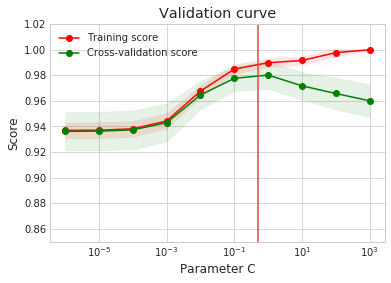

In [56]:
logreg =  LogisticRegression()
param_range = np.logspace(-6, 3, 10)
param_name="C"
ylim=[0.85, 1.02]
validation_curve_model(df_features.values,df_y.values, logreg, "C", param_range, cv, ylim=ylim,log=True)
plt.axvline(x=0.5)

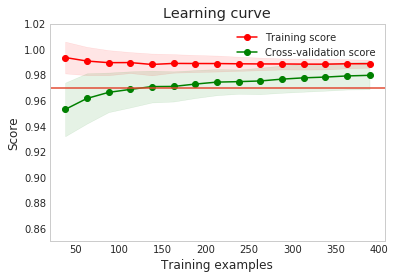

In [57]:
logreg =  LogisticRegression(C=0.5)
train_size=np.linspace(.1, 1.0, 15)

learning_curve_model(df_features.values,df_y.values, logreg, cv, train_size, ylim=ylim)
plt.axhline(y=0.97)

the Learning curve shows a convergence of the two curves around 150 examples with validation scores over 97%

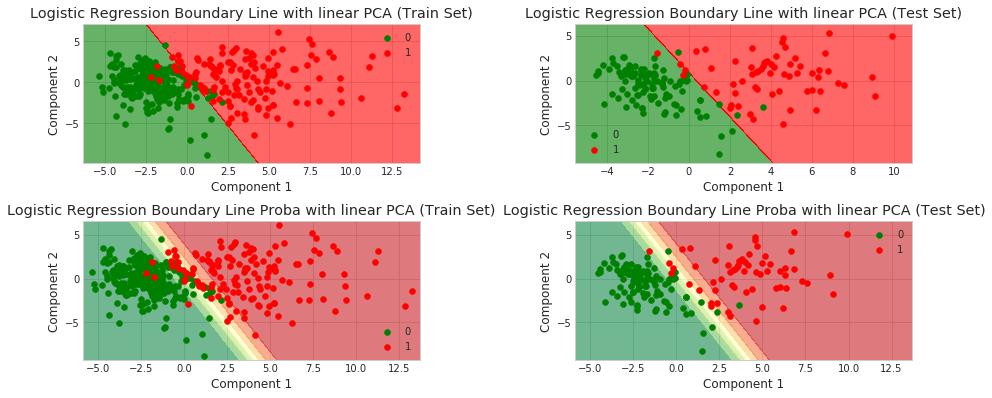

In [58]:
BoundaryLine('linear', logreg, "Logistic Regression")

Boundary Line  show the results on he training  (left column) and  test set (right column). 
In the yellow area, in the Boundary Line Probabilistic plot, the model has the same probability tho assign B(green) or M class (red) 

	------	 Reduced Data Logistic Regression 	-------
Confusion matrix PCA (3D):
 [[103   3]
 [  4  58]]
             precision    recall  f1-score   support

          0       0.96      0.97      0.97       106
          1       0.95      0.94      0.94        62

avg / total       0.96      0.96      0.96       168

Cross validation score           :  0.9534011164274323
Cross validation recall          :  0.9323809523809523
Cross validation f1 score        :  0.9361783943037487
Cross validation precision score :  0.984691705851621

	------	 Real Data Logistic Regression 	-------
Confusion matrix :
  [[106   0]
 [  1  61]]
             precision    recall  f1-score   support

          0       0.99      1.00      1.00       106
          1       1.00      0.98      0.99        62

avg / total       0.99      0.99      0.99       168

Cross validation score           :  0.9856470722260197
Cross validation recall          :  0.9709523809523809
Cross validation f1 score        :  0.98011257

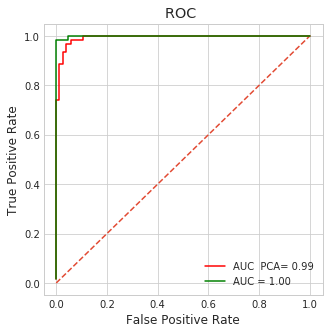

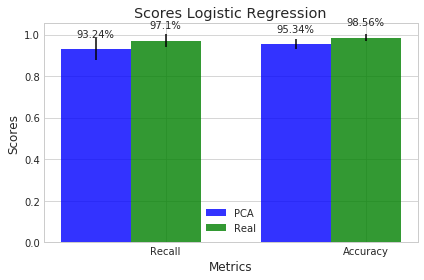

In [59]:
logreg =  LogisticRegression(C=0.5)
logreg_scores = evalute_realdata_PCAreduction( logreg, "Logistic Regression")
plot_scores(logreg_scores,"Logistic Regression")


With Logistic Regression on Real Data we obtained:
* Cross validation score           : ** 0.985**
* Cross validation recall          :  **0.97**

## K-Nearest Neighbor

"In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small)." [ wiki](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)


In [61]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier #http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

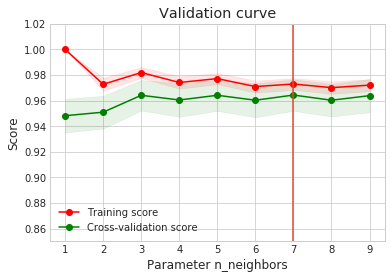

In [64]:
kneigh =  KNeighborsClassifier()

param_range = range(1,10,1)

param_name="n_neighbors"

validation_curve_model(df_features.values,df_y.values, kneigh, param_name, param_range, cv, ylim=ylim,log=False)

plt.axvline(x=7)

Results on training and on the validation set are similar. From the point highlighted on the graph,   curves tend to converge (parameter number of neighbors = 7); 

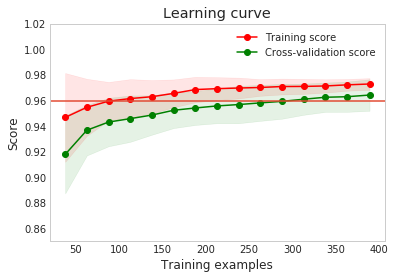

In [65]:
kneigh =  KNeighborsClassifier(n_neighbors=7)
train_size=np.linspace(.1, 1.0, 15)
learning_curve_model(df_features.values,df_y.values, kneigh, cv, train_size, ylim=ylim)
plt.axhline(y=0.96)

the performances are high (96%) and do not change from 250 

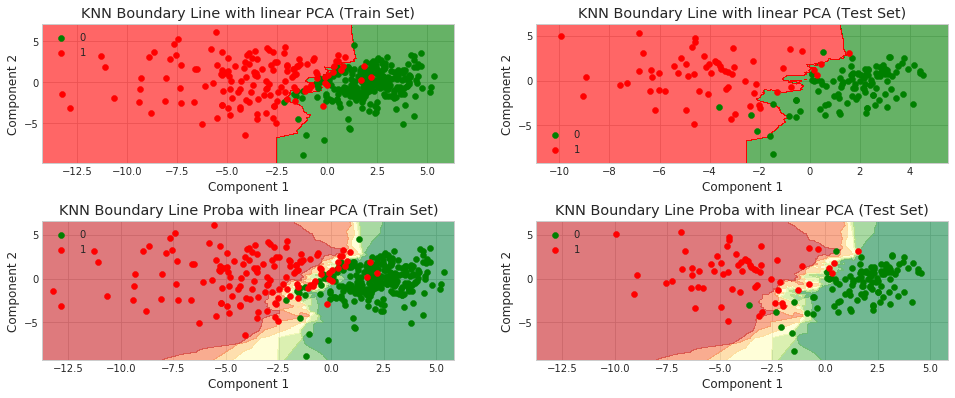

In [66]:
 BoundaryLine("linear", kneigh, "KNN")

Boundary Line is not regular because it labels an element based on the characteristics of the neighboring elements.

	------	 Reduced Data KNN 	-------
Confusion matrix PCA (3D):
 [[102   4]
 [  5  57]]
             precision    recall  f1-score   support

          0       0.95      0.96      0.96       106
          1       0.93      0.92      0.93        62

avg / total       0.95      0.95      0.95       168

Cross validation score           :  0.9246012759170654
Cross validation recall          :  0.8690476190476192
Cross validation f1 score        :  0.8928126216958054
Cross validation precision score :  0.9672395877093269

	------	 Real Data KNN 	-------
Confusion matrix :
  [[104   2]
 [  3  59]]
             precision    recall  f1-score   support

          0       0.97      0.98      0.98       106
          1       0.97      0.95      0.96        62

avg / total       0.97      0.97      0.97       168

Cross validation score           :  0.9677227158806107
Cross validation recall          :  0.9269047619047617
Cross validation f1 score        :  0.9544495412141767
Cross validation preci

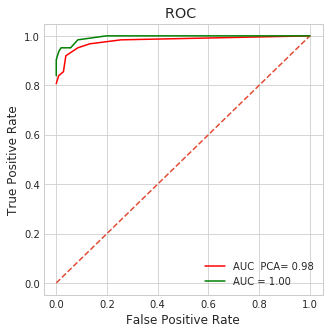

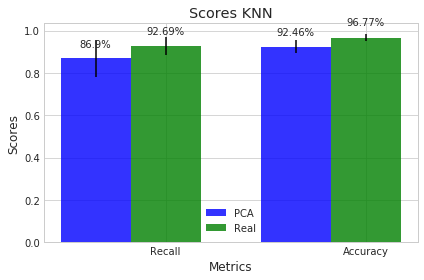

In [68]:
kneigh =  KNeighborsClassifier(n_neighbors=7)
kneigh_scores = evalute_realdata_PCAreduction( kneigh, "KNN")
plot_scores(kneigh_scores,"KNN")

There is a big difference in performance between PCA and Real Data

With K-Nearest Neighbor on Real Data we obtained:

* Cross validation score : **0.967**
* Cross validation recall : **0.927**

## Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. [wiki](https://en.wikipedia.org/wiki/Random_forest)

In [70]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

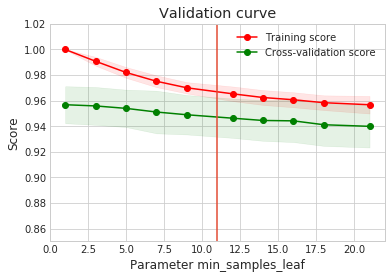

In [71]:
r_forest = RandomForestClassifier(n_estimators=80) 
param_range = np.linspace(1, 21, 10).astype(int)
param_name="min_samples_leaf"
validation_curve_model(df_features.values,df_y.values, r_forest, param_name, param_range, cv, ylim=ylim,log=False)
plt.axvline(x=11)

I evaluated the fitting by varying a pruning parameter. A good value is 11. 

We note that as the "min_samples_leaf" parameter grows we may encounter underfitting

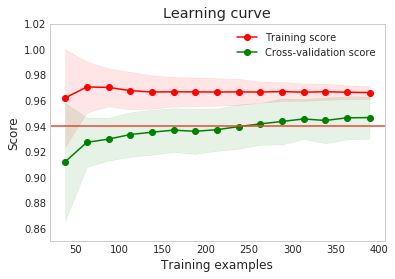

In [73]:
r_forest = RandomForestClassifier(n_estimators=80,min_samples_leaf=11)
learning_curve_model(df_features.values,df_y.values, r_forest , cv, train_size, ylim=ylim)
plt.axhline(y=0.94)

learning curve: training and validation sets converge for high values

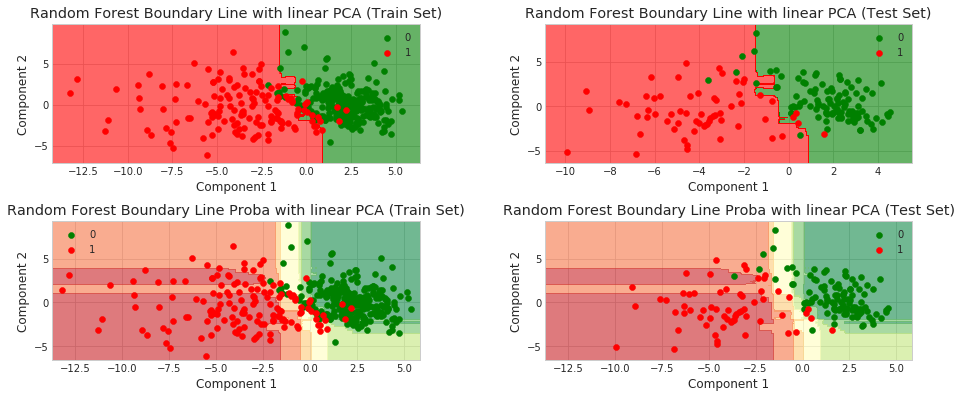

In [74]:
 BoundaryLine('linear',r_forest, "Random Forest")

The boundary demarcation line is the clear sign of the superposition of n models (70) 

	------	 Reduced Data Random Forest 	-------
Confusion matrix PCA (3D):
 [[98  8]
 [ 4 58]]
             precision    recall  f1-score   support

          0       0.96      0.92      0.94       106
          1       0.88      0.94      0.91        62

avg / total       0.93      0.93      0.93       168

Cross validation score           :  0.9320317840054682
Cross validation recall          :  0.884047619047619
Cross validation f1 score        :  0.8993574778606274
Cross validation precision score :  0.9739092559000071

	------	 Real Data Random Forest 	-------
Confusion matrix :
  [[102   4]
 [  5  57]]
             precision    recall  f1-score   support

          0       0.95      0.96      0.96       106
          1       0.93      0.92      0.93        62

avg / total       0.95      0.95      0.95       168

Cross validation score           :  0.9571012759170653
Cross validation recall          :  0.9228571428571428
Cross validation f1 score        :  0.9298427532006659
Cross v

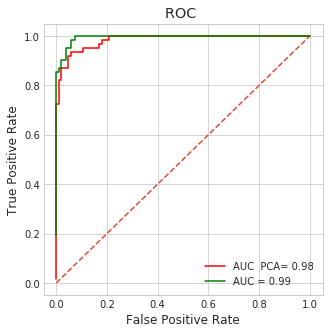

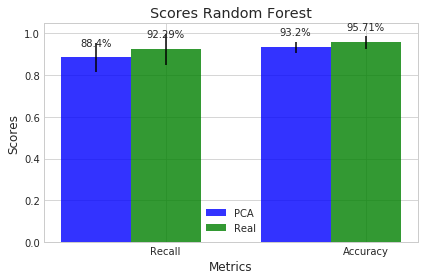

In [75]:
r_forest = RandomForestClassifier(n_estimators=80,min_samples_leaf=11)
r_forest_scores = evalute_realdata_PCAreduction( r_forest, "Random Forest")
plot_scores(r_forest_scores,"Random Forest")

With Random Forest on Real Data we obtained:

* Cross validation score : **0.95**
* Cross validation recall : **0.92**

## Support Vector - linear

In machine learning, support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting).  [wiki](https://en.wikipedia.org/wiki/Support_vector_machine)

In [76]:
#Support Vector - linear
from sklearn.svm import SVC # http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

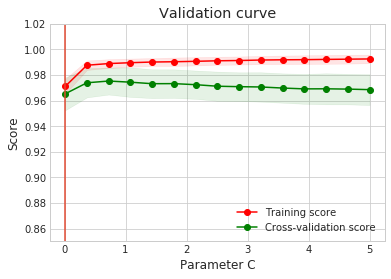

In [77]:
param_range = np.linspace(0.01, 5, 15)
param_name="C"
scvl = SVC(kernel = 'linear')
validation_curve_model(df_features.values,df_y.values,scvl, param_name, param_range, cv, ylim=ylim,log=False)
plt.axvline(x=0.01)

a good value of the parameter C is 0.01. increasing the value of the parameter we obtain the overfitting

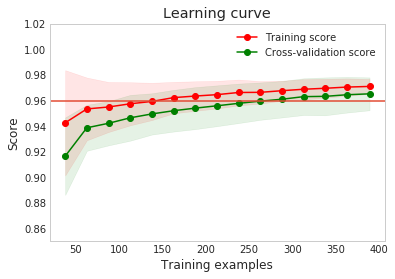

In [78]:
scvl = SVC(kernel = 'linear', C=0.01)
learning_curve_model(df_features.values,df_y.values, scvl, cv, train_size, ylim=ylim)
plt.axhline(y=0.96)

learning curve : already with 250 we have high score

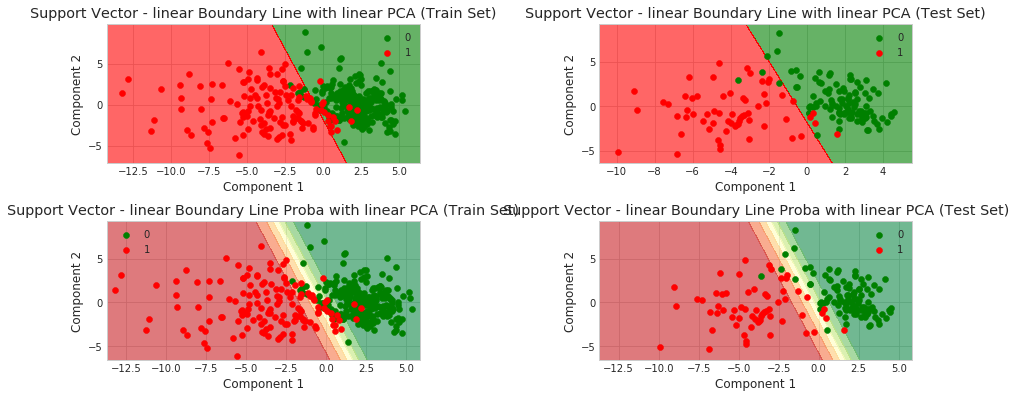

In [79]:
svcl = SVC(kernel = 'linear',C=0.01, probability=True)
BoundaryLine('linear',svcl, "Support Vector - linear")

An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

	------	 Reduced Data Support Vector - linear 	-------
Confusion matrix PCA (3D):
 [[103   3]
 [  4  58]]
             precision    recall  f1-score   support

          0       0.96      0.97      0.97       106
          1       0.95      0.94      0.94        62

avg / total       0.96      0.96      0.96       168

Cross validation score           :  0.9427494873547504
Cross validation recall          :  0.8938095238095238
Cross validation f1 score        :  0.9189247744125792
Cross validation precision score :  0.9843599019110088

	------	 Real Data Support Vector - linear 	-------
Confusion matrix :
  [[106   0]
 [  3  59]]
             precision    recall  f1-score   support

          0       0.97      1.00      0.99       106
          1       1.00      0.95      0.98        62

avg / total       0.98      0.98      0.98       168

Cross validation score           :  0.9660019366598313
Cross validation recall          :  0.913095238095238
Cross validation f1 score        :  0.

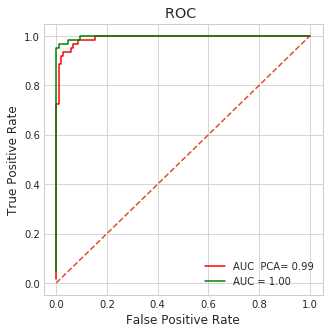

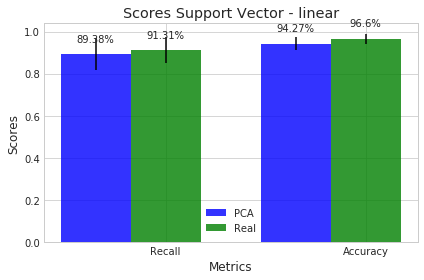

In [80]:
svcl_scores = evalute_realdata_PCAreduction( svcl, "Support Vector - linear")
plot_scores(svcl_scores,"Support Vector - linear")

Performance does not change much between PCA and real data (as you seen in the ROC curves).

With Support Vector Linear on Real Data we obtained:

* Cross validation score : **0.966**
* Cross validation recall : **0.91**

## SVM - rbf

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.


The validation curve illustrates the effect of the parameter C of the Radial Basis Function (RBF) kernel SVM.

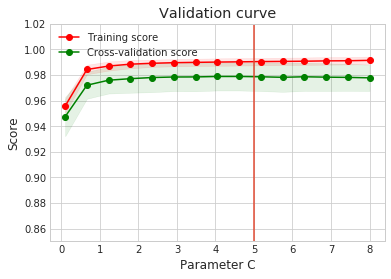

In [81]:
param_range = np.linspace(0.1, 8, 15)
param_name="C"
scvr = SVC(kernel = 'rbf')
validation_curve_model(df_features.values,df_y.values,scvr, param_name, param_range, cv, ylim=ylim,log=False)
plt.axvline(x=5)

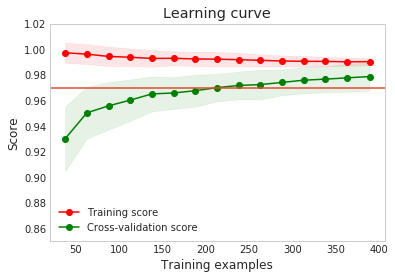

In [82]:
svcrbf = SVC(kernel = 'rbf', C=5)
learning_curve_model(df_features.values,df_y.values, svcrbf, cv, train_size, ylim=ylim)
plt.axhline(y=0.97)

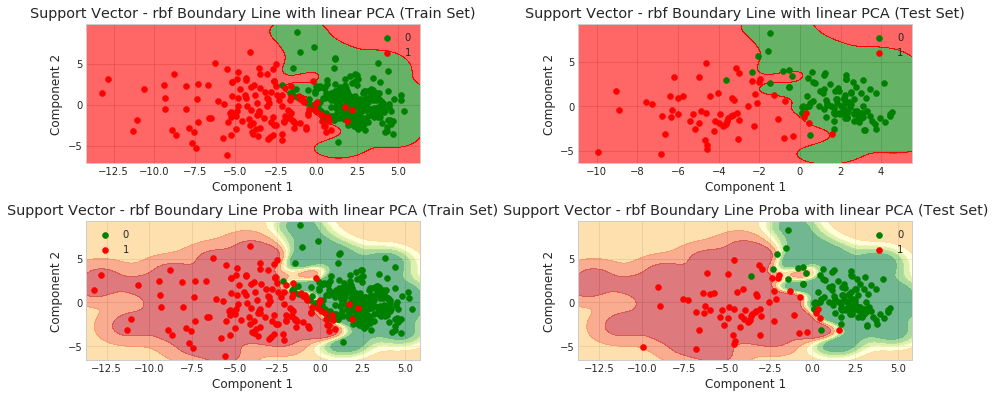

In [83]:
svcrbf = SVC(kernel = 'rbf',probability=True, C=5)
BoundaryLine('linear',svcrbf, "Support Vector - rbf")

in BoundaryLine you can see as exponential function  works [wiki](https://en.wikipedia.org/wiki/Radial_basis_function)

	------	 Reduced Data Support Vector - rbf 	-------
Confusion matrix PCA (3D):
 [[99  7]
 [ 5 57]]
             precision    recall  f1-score   support

          0       0.95      0.93      0.94       106
          1       0.89      0.92      0.90        62

avg / total       0.93      0.93      0.93       168

Cross validation score           :  0.9264194577352471
Cross validation recall          :  0.8935714285714285
Cross validation f1 score        :  0.898497506683016
Cross validation precision score :  0.9259012608141794

	------	 Real Data Support Vector - rbf 	-------
Confusion matrix :
  [[106   0]
 [  2  60]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       106
          1       1.00      0.97      0.98        62

avg / total       0.99      0.99      0.99       168

Cross validation score           :  0.9819793802688539
Cross validation recall          :  0.9559523809523809
Cross validation f1 score        :  0.9745956354

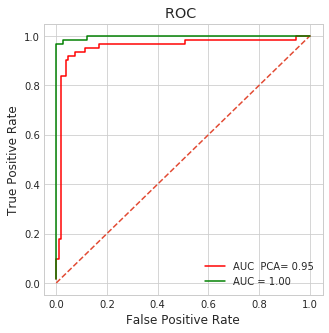

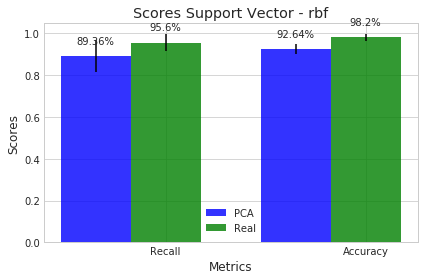

In [84]:
svcrbf_scores = evalute_realdata_PCAreduction( svcrbf, "Support Vector - rbf")
plot_scores(svcrbf_scores,"Support Vector - rbf")

There is a big difference in performance between PCA and Real Data (as shown in ROC curves)

With Suppport Vector RBF on Real Data we obtained:

* Cross validation score : **0.98**
* Cross validation recall : **0.956**

## Support Vector - polynomial

Let's try Support Vector - polynomial

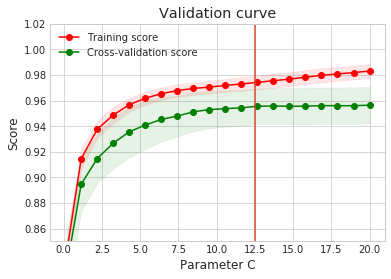

In [85]:
param_range = np.linspace(0.1, 20, 20)
param_name="C"
scvpoly = SVC(kernel = 'poly')
validation_curve_model(df_features.values,df_y.values,scvpoly, param_name, param_range, cv, ylim=ylim,log=False)
plt.axvline(x=12.5)

After the value 12.5 the curve diverges

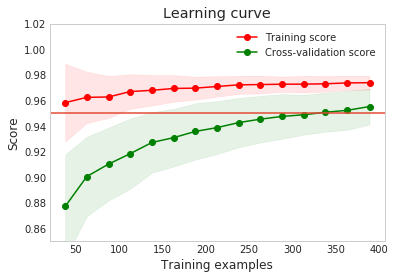

In [86]:
svcpoly = SVC(kernel = 'poly',probability=True, C=12.5)
learning_curve_model(df_features.values,df_y.values, svcpoly, cv, train_size, ylim=ylim)
plt.axhline(y=0.95)

	------	 Reduced Data Support Vector - poly 	-------
Confusion matrix PCA (3D):
 [[101   5]
 [  5  57]]
             precision    recall  f1-score   support

          0       0.95      0.95      0.95       106
          1       0.92      0.92      0.92        62

avg / total       0.94      0.94      0.94       168

Cross validation score           :  0.9338847117794487
Cross validation recall          :  0.8695238095238095
Cross validation f1 score        :  0.9055492272029573
Cross validation precision score :  0.9798862104458668

	------	 Real Data Support Vector - poly 	-------
Confusion matrix :
  [[106   0]
 [  4  58]]
             precision    recall  f1-score   support

          0       0.96      1.00      0.98       106
          1       1.00      0.94      0.97        62

avg / total       0.98      0.98      0.98       168

Cross validation score           :  0.9552853725222146
Cross validation recall          :  0.8980952380952381
Cross validation f1 score        :  0.936

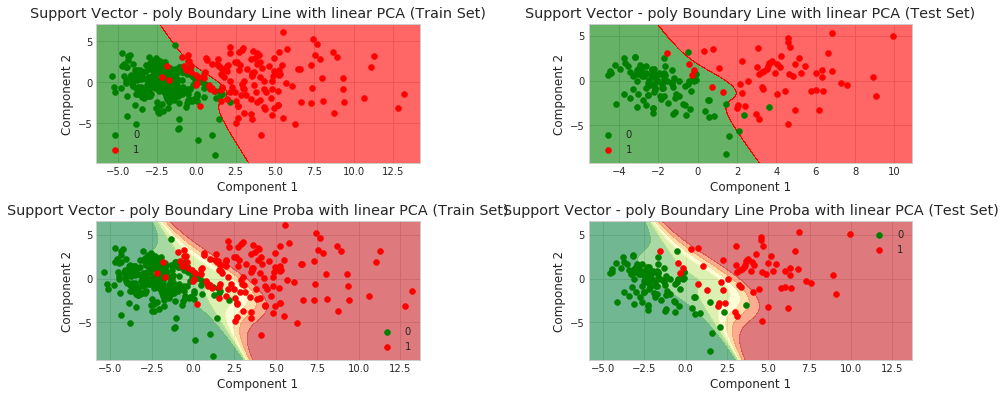

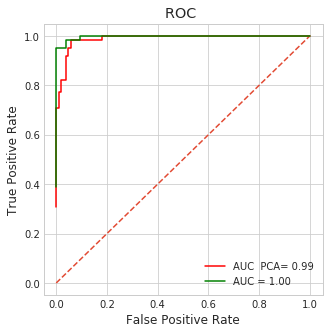

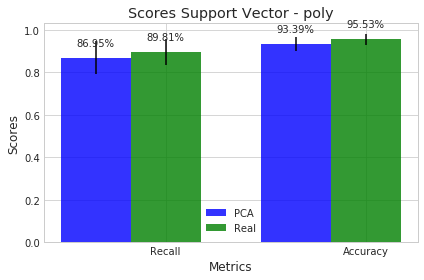

In [87]:
BoundaryLine('linear',svcpoly, "Support Vector - poly")
svcpoly_scores = evalute_realdata_PCAreduction( svcpoly, "Support Vector - poly")
plot_scores(svcpoly_scores,"Support Vector - poly")

Performance is lower than other models

With Suppport Vector Poly on Real Data we obtained:

* Cross validation score : **0.95**
* Cross validation recall : **0.898**

## AdaBoostClassifier

AdaBoost, short for Adaptive Boosting, is a machine learning meta-algorithm formulated by Yoav Freund and Robert Schapire, who won the 2003 Gödel Prize for their work. It can be used in conjunction with many other types of learning algorithms to improve performance. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. [wiki](https://en.wikipedia.org/wiki/Radial_basis_function)

In [88]:
from sklearn.ensemble import AdaBoostClassifier #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [ ]:
ABC = AdaBoostClassifier()

param_range = np.linspace(0.01, 0.2, 20)
param_name="learning_rate"
validation_curve_model(df_features.values,df_y.values, ABC, param_name, param_range, cv, ylim=ylim,log=False)
plt.axvline(x=0.1)

The curve diverges after the value 0.1 (overfitting)

Learning rate shrinks the contribution of each classifier by learning_rate.

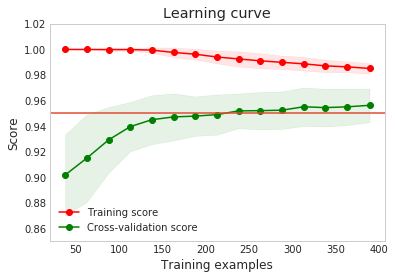

In [89]:
ada =  AdaBoostClassifier(learning_rate=  0.1)
learning_curve_model(df_features.values,df_y.values, ada, cv, train_size,ylim=ylim)
plt.axhline(y=0.95)

The score doesn't change much after 200

	------	 Reduced Data Ada Boost 	-------
Confusion matrix PCA (3D):
 [[102   4]
 [  5  57]]
             precision    recall  f1-score   support

          0       0.95      0.96      0.96       106
          1       0.93      0.92      0.93        62

avg / total       0.95      0.95      0.95       168

Cross validation score           :  0.9391119845067213
Cross validation recall          :  0.8985714285714284
Cross validation f1 score        :  0.9145379893514054
Cross validation precision score :  0.9780285090931236

	------	 Real Data Ada Boost 	-------
Confusion matrix :
  [[103   3]
 [  5  57]]
             precision    recall  f1-score   support

          0       0.95      0.97      0.96       106
          1       0.95      0.92      0.93        62

avg / total       0.95      0.95      0.95       168

Cross validation score           :  0.9552517657780817
Cross validation recall          :  0.9223809523809523
Cross validation f1 score        :  0.9382349898263265
Cross vali

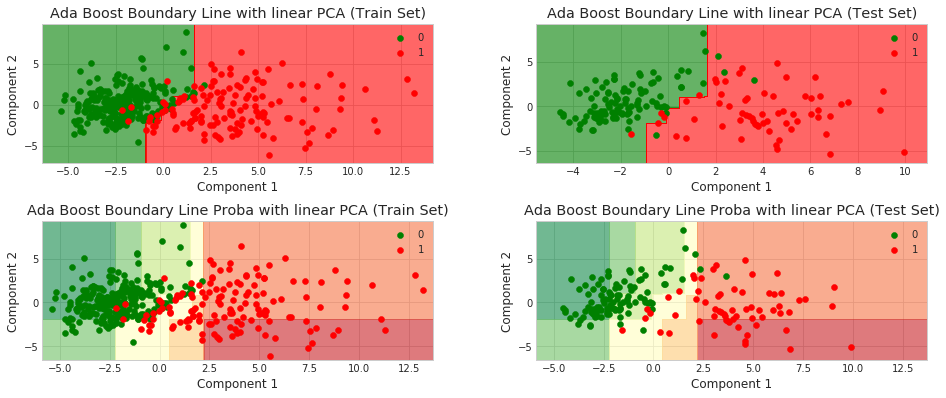

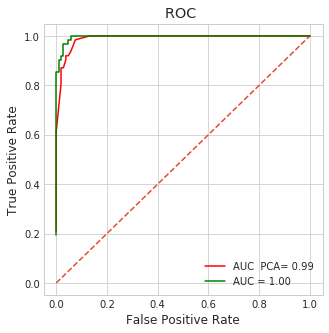

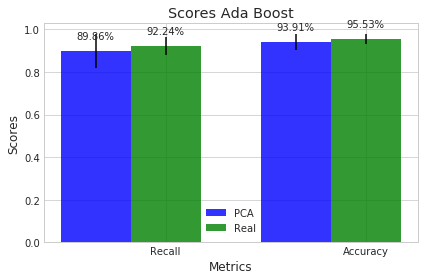

In [90]:
BoundaryLine('linear',ada, "Ada Boost")
ada_scores = evalute_realdata_PCAreduction( ada, "Ada Boost")
plot_scores(ada_scores,"Ada Boost")

With Ada Boost on Real Data we obtained:

* Cross validation score : **0.955**
* Cross validation recall : **0.922**

## Bagging

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [91]:
from sklearn.ensemble import BaggingClassifier #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

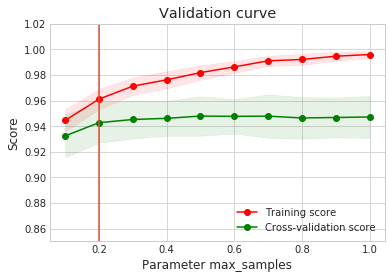

In [92]:
bagging = BaggingClassifier()
param_name="max_samples"
param_range = np.linspace(0.1, 1.0, 10)
validation_curve_model(df_features.values,df_y.values, bagging, param_name, param_range, cv, ylim=ylim,log=False)
plt.axvline(x=0.2)

max_sample = the number of samples to be extracted X to train each base estimator


In [ ]:
bagging = BaggingClassifier(max_samples=0.2)
learning_curve_model(df_features.values,df_y.values, bagging, cv, train_size,ylim=ylim)
plt.axhline(y=0.94)

The score doesn't change much after 300

	------	 Reduced Data Bagging 	-------
Confusion matrix PCA (3D):
 [[100   6]
 [  7  55]]
             precision    recall  f1-score   support

          0       0.93      0.94      0.94       106
          1       0.90      0.89      0.89        62

avg / total       0.92      0.92      0.92       168

Cross validation score           :  0.931870585554796
Cross validation recall          :  0.8880952380952382
Cross validation f1 score        :  0.9084361826590982
Cross validation precision score :  0.9555214091893198

	------	 Real Data Bagging 	-------
Confusion matrix :
  [[101   5]
 [  4  58]]
             precision    recall  f1-score   support

          0       0.96      0.95      0.96       106
          1       0.92      0.94      0.93        62

avg / total       0.95      0.95      0.95       168

Cross validation score           :  0.95164673046252
Cross validation recall          :  0.903095238095238
Cross validation f1 score        :  0.9226308839783182
Cross validation p

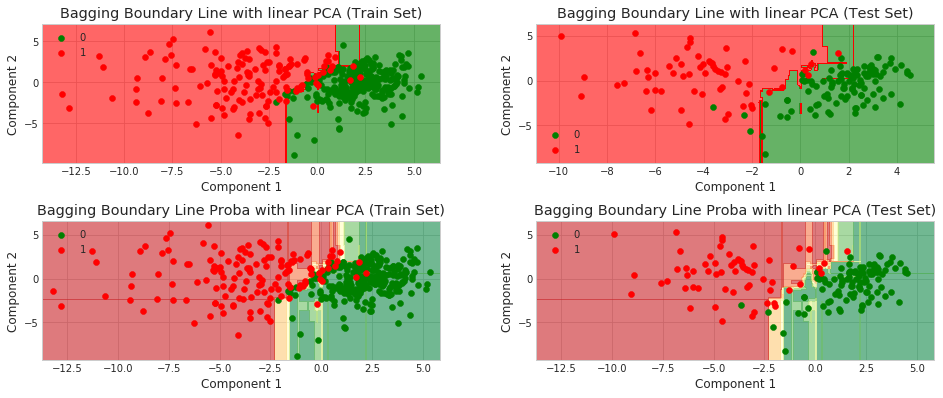

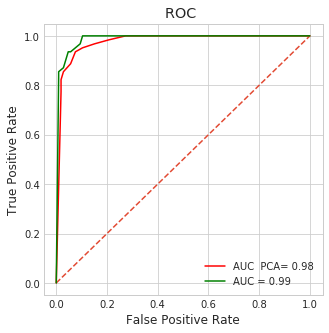

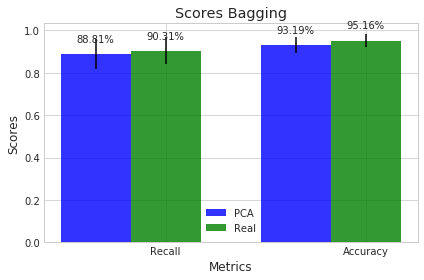

In [99]:
BoundaryLine('linear',bagging, "Bagging")
bagging_scores = evalute_realdata_PCAreduction( bagging, "Bagging")
plot_scores(bagging_scores,"Bagging")

With Ada Boost on Real Data we obtained:

* Cross validation score : **0.946**
* Cross validation recall : **0.89**

## Neural Network

A multilayer perceptron (MLP) is a class of feedforward artificial neural network. An MLP consists of at least three layers of nodes. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

In [94]:
from sklearn.neural_network import MLPClassifier #http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

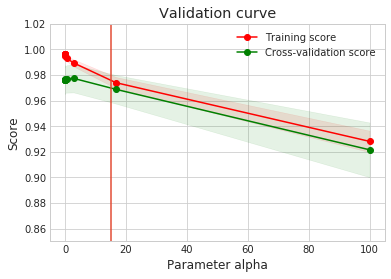

In [95]:
mlp = MLPClassifier(max_iter=1000)
param_range = np.logspace(-5, 2, 10)

param_name="alpha" # L2 penalty (regularization term) parameter
validation_curve_model(df_features.values,df_y.values, mlp, param_name, param_range, cv, ylim=ylim,log=False)
plt.axvline(x=15)

A good value is 15 for alpha.  Alpha is L2 penalty (regularization term) parameter

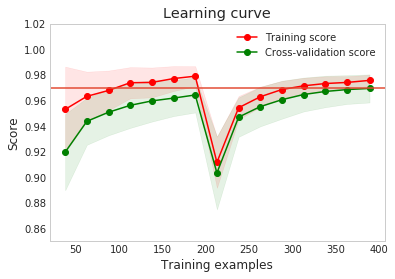

In [114]:
mlp = MLPClassifier(max_iter=1000, alpha=15)
learning_curve_model(df_features.values,df_y.values, mlp, cv, train_size, ylim=ylim)
plt.axhline(y=0.97)

there is a rapid decline in performance around 220

	------	 Reduced Data MLP Classifier 	-------
Confusion matrix PCA (3D):
 [[102   4]
 [  4  58]]
             precision    recall  f1-score   support

          0       0.96      0.96      0.96       106
          1       0.94      0.94      0.94        62

avg / total       0.95      0.95      0.95       168

Cross validation score           :  0.9445038733196627
Cross validation recall          :  0.8838095238095237
Cross validation f1 score        :  0.9200963948332369
Cross validation precision score :  0.9845967440162717

	------	 Real Data MLP Classifier 	-------
Confusion matrix :
  [[106   0]
 [  3  59]]
             precision    recall  f1-score   support

          0       0.97      1.00      0.99       106
          1       1.00      0.95      0.98        62

avg / total       0.98      0.98      0.98       168

Cross validation score           :  0.9659694691273637
Cross validation recall          :  0.9176190476190473
Cross validation f1 score        :  0.9540895625555444


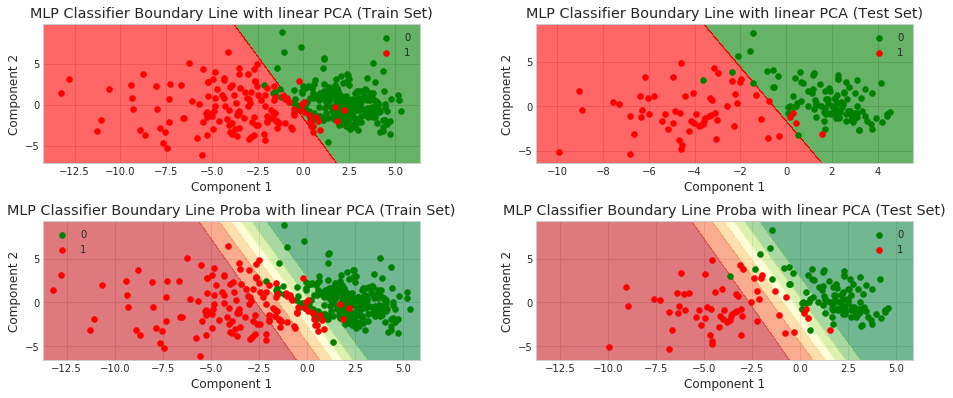

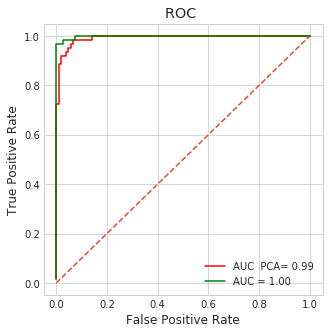

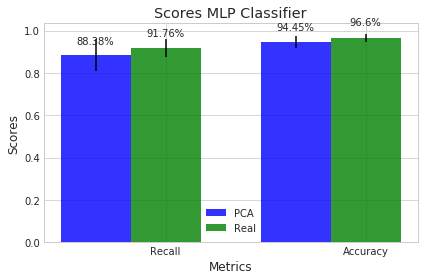

In [116]:
BoundaryLine('linear',mlp, "MLP Classifier")
mlp_scores = evalute_realdata_PCAreduction( mlp, "MLP Classifier")
plot_scores(mlp_scores,"MLP Classifier")

With MLP on Real Data we obtained:

* Cross validation score : **0.97**
* Cross validation recall : **0.917**

## Ranking

In [119]:
models = pd.DataFrame({'Model': ["Logistic Regression","K-Nearest Neighbors", "Random Forest", "Support Vector - linear", 
                                "Support Vector -  rbf", "Support Vector -  poly","Ada Boost", "Bagging Classifier","MLP Classifier "],
                      'KFoldScore':
                      [logreg_scores[3].mean(),  kneigh_scores[3].mean(), r_forest_scores[3].mean(),  svcl_scores[3].mean(),
                       svcrbf_scores[3].mean(), svcpoly_scores[3].mean(), ada_scores[3].mean(), bagging_scores[3].mean(), mlp_scores[3].mean()],
                      'Std (Score)': 
                      [logreg_scores[3].std(),  kneigh_scores[3].std(), r_forest_scores[3].std(), svcl_scores[3].std(), 
                       svcrbf_scores[3].std(), svcpoly_scores[3].std(), ada_scores[3].std(), bagging_scores[3].std(), mlp_scores[3].std()],
                'KFoldRecall':
                      [logreg_scores[2].mean(),  kneigh_scores[2].mean(), r_forest_scores[2].mean(),  svcl_scores[2].mean(),
                       svcrbf_scores[2].mean(), svcpoly_scores[2].mean(), ada_scores[2].mean(), bagging_scores[2].mean(), mlp_scores[2].mean()],
                      'Std (Recall)': 
                      [logreg_scores[2].std(), kneigh_scores[2].std(), r_forest_scores[2].std(), svcl_scores[2].std(), 
                       svcrbf_scores[2].std(), svcpoly_scores[2].std(), ada_scores[2].std(), bagging_scores[2].std(), mlp_scores[2].std()]})

models.sort_values(by='KFoldRecall', ascending=False)

KFoldRecall  KFoldScore                    Model  Std (Recall)  Std (Score)
0     0.970952    0.985647      Logistic Regression      0.032608     0.015808
4     0.955952    0.981979    Support Vector -  rbf      0.040870     0.016192
1     0.926905    0.967723      K-Nearest Neighbors      0.044071     0.017400
2     0.922857    0.957101            Random Forest      0.074026     0.031565
6     0.922381    0.955252                Ada Boost      0.043255     0.023774
8     0.917619    0.965969          MLP Classifier       0.042301     0.018505
3     0.913095    0.966002  Support Vector - linear      0.062834     0.023126
7     0.903095    0.951647       Bagging Classifier      0.063380     0.031822
5     0.898095    0.955285   Support Vector -  poly      0.061425     0.026431

The winner is **Logistic Regression** 

![alt text](https://chemicalstatistician.files.wordpress.com/2014/05/pregnant.jpg?w=500&h=374)

# Clustering

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).


Clustering algorithms can be categorized based on their cluster model. The following we will see Hierarchical and K-means clustering

In [120]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import matplotlib.gridspec as gridspec # subplots
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage,median  # linkage analysis and dendrogram for visualization
from scipy.cluster.hierarchy import fcluster  # simple clustering
from scipy.spatial.distance import pdist, squareform # metric
from sklearn import datasets, metrics
%matplotlib inline

## Hierarchical clustering

In data mining and statistics, hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. [wiki](https://en.wikipedia.org/wiki/Hierarchical_clustering)

In the first instance, there was the need to identify, among others, the most appropriate linkage function.

### Functions Utils

In [121]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram ')
        plt.xlabel('sample index')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

def getCenter(D,clusters): # distance matrix and clusters
  err = .0
  centers = []
  contr = []
  for i in range(len(set(clusters))):
    id_pts = [index for index,value in enumerate(clusters) if value == i+1] #ids cluster i-th
    sub_ms = D[id_pts,:][:,id_pts] #sub distance matrix
    err = err + np.sum(D[np.argmin(np.mean(sub_ms, axis=0)), :])  # errore assoluto  +=  somma riga centroide della matrice D

    beta = 1
    index = np.exp(-beta * sub_ms / sub_ms.std()).sum(axis=1).argmax()
    centers.append(id_pts[index])
    contr.append(float("{0:.2f}".format((len(sub_ms) * 100) / len(D))))
    
  return contr,err,centers 
    


### Linkage functions.
As evidenced by the plot, among the various linkage functions selected, the ward method was the most suitable, as it allowed to create clusters and well separated clusters.

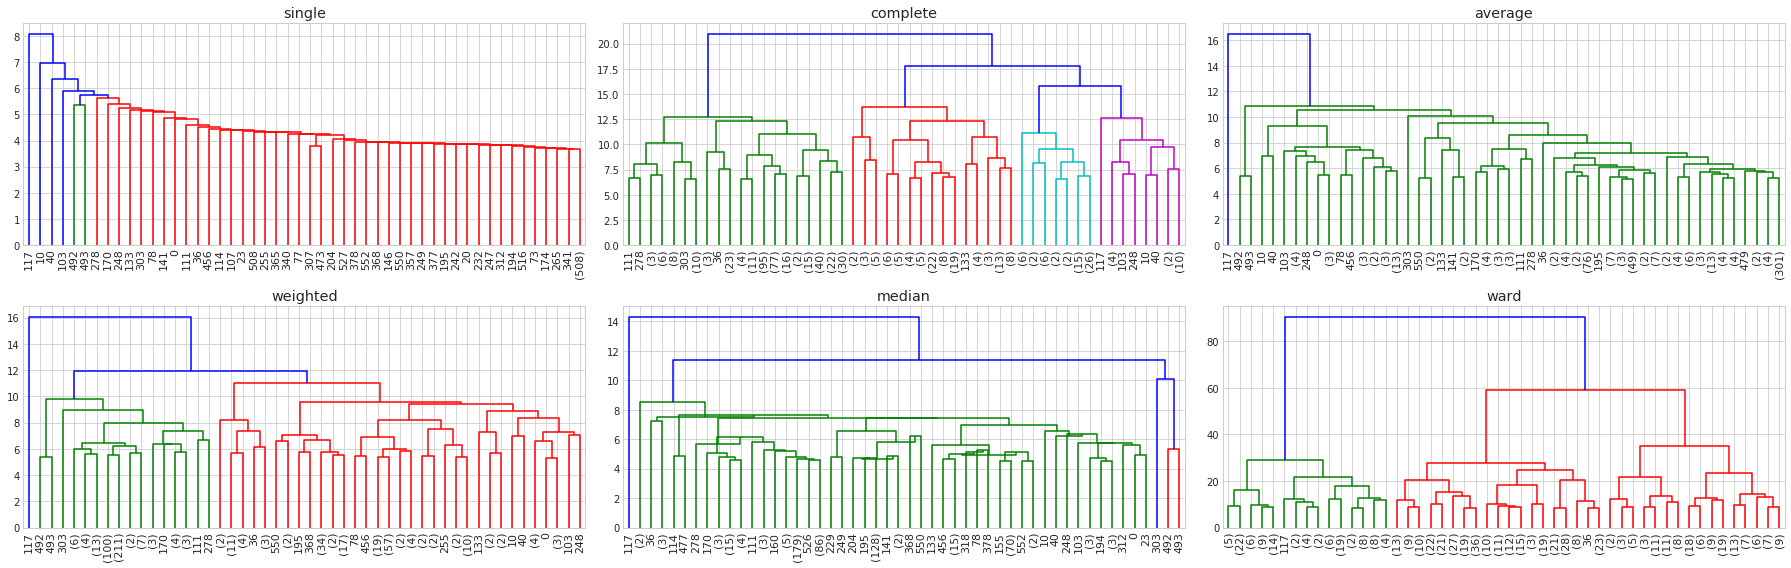

In [122]:
D = df_features.values

#ward = Similarity of two clusters is based on the increase in squared error when two clusters are merged
methods = ['single','complete','average','weighted','median','ward']


plt.figure(figsize=(25, 8))
for i in range(len(methods)):
  plt.subplot(231+i)
  Z = linkage(D, method=methods[i]) #Perform hierarchical/agglomerative clustering. 
  de = dendrogram(
      Z,
      leaf_rotation=90.,
      leaf_font_size=11.,
      distance_sort='descending',
      truncate_mode = 'lastp',
      p=50
      
  )
  plt.title(methods[i])

plt.tight_layout()

Ward suggests 2 clusters by default (different color)

### Ward Linkage K = 2



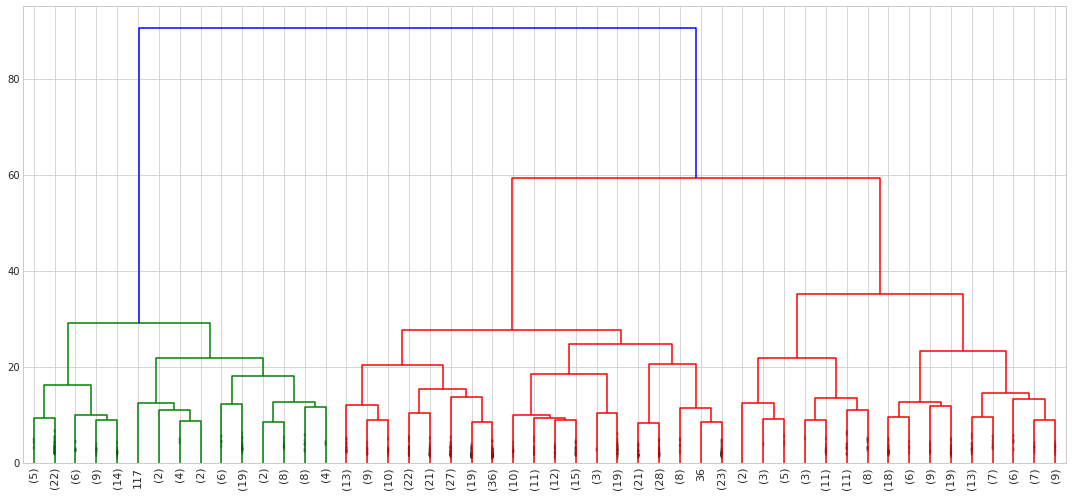

In [123]:
sns.set_style('whitegrid') 
D = df_features.values

Z = linkage(D, method='ward', metric='euclidean') #Perform hierarchical/agglomerative clustering. ward = Similarity of two clusters is based on the increase in squared error when two clusters are merged
 
plt.figure(figsize=(15, 7))
dendrogram(
    Z,
    
    leaf_rotation=90.,
    leaf_font_size=11.,
    show_contracted=True,
    distance_sort='descending',
    truncate_mode = 'lastp',
    p=50
)

plt.tight_layout()

the dendrogram function with ward divides the data into 2 groups (it cuts to 70% of the maximum length) by default 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

centroid:  [504, 74] 	 %items  [20.11, 79.89]


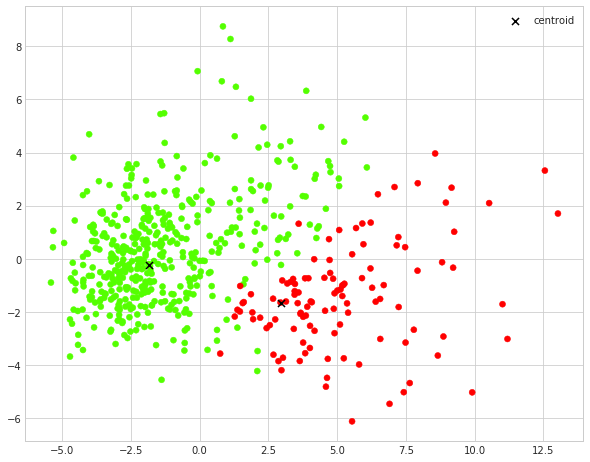

In [124]:
pca_2d = PCA(n_components=2)
X = pca_2d.fit_transform(D)
Y = pdist(D, 'euclidean')
Y = squareform(Y)
Y.shape
k=2
clusters = fcluster(Z, k, criterion='maxclust')
contr, err,centers = getCenter(Y,clusters)
print('centroid: ',centers,'\t %items ',contr)

plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.scatter([X[504,0], X[74,0]],[X[504,1], X[74,1]], c='black', cmap='prism',marker='x',s=50,
            label="centroid")  # plot points with cluster dependent colors
plt.legend()

plt.show()

In [125]:
noscaled_features =scaler.inverse_transform(df_features.values)# de normalizzo per vedere i valori reali dei centroidi
df_features_noscaled = pd.DataFrame(noscaled_features, index=df_features.index, columns=df_features.columns)
df_features_y =  pd.concat([df_features_noscaled,df_y], axis=1)
print("----------------- Centroide Cluster 1 ----------------- ")
print(df_features_y.iloc[70,:])
print("----------------- Centroide Cluster 2 ----------------- ")
print(df_features_y.iloc[504,:])

----------------- Centroide Cluster 1 ----------------- 
radius_mean                   12.31
texture_mean                  16.52
perimeter_mean                79.19
area_mean                     470.9
smoothness_mean             0.09172
compactness_mean            0.06829
concavity_mean              0.03372
concave points_mean         0.02272
symmetry_mean                 0.172
fractal_dimension_mean      0.05914
radius_se                    0.2505
texture_se                    1.025
perimeter_se                   1.74
area_se                       19.68
smoothness_se              0.004854
compactness_se              0.01819
concavity_se                0.01826
concave points_se          0.007965
symmetry_se                 0.01386
fractal_dimension_se       0.002304
radius_worst                  14.11
texture_worst                 23.21
perimeter_worst               89.71
area_worst                    611.1
smoothness_worst             0.1176
compactness_worst            0.1843
concavi

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


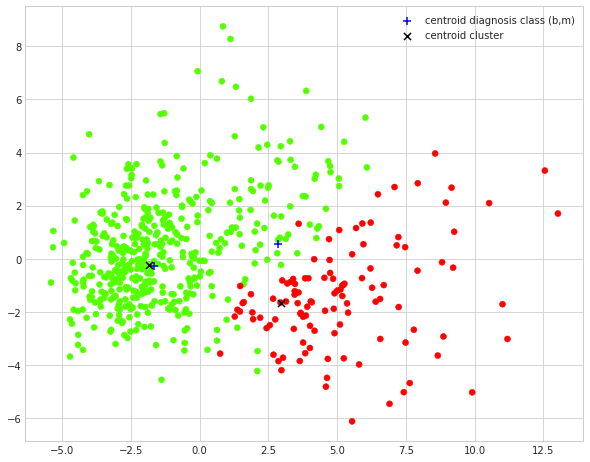

In [126]:

mean_pca_M = pca_2d.transform(df_features_y_clean[ df_features_y_clean['diagnosis']=='M'].mean().reshape(1, -1))

mean_pca_B = pca_2d.transform(df_features_y_clean[ df_features_y_clean['diagnosis']=='B'].mean().reshape(1, -1))


plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.scatter([mean_pca_M[:,0], mean_pca_B[:,0]],[mean_pca_M[:,1], mean_pca_B[:,1]], c='blue', cmap='prism',marker='+',s=50,
            label="centroid diagnosis class (b,m)")  # plot points with cluster dependent colors
plt.scatter([X[504,0], X[74,0]],[X[504,1], X[74,1]], c='black', cmap='prism',marker='x',s=50,
            label="centroid cluster")  # plot points with cluster dependent colors

plt.legend()

plt.show()

It is interesting to note how the centroids of the clusters fall very close to the average values of the two classes of tumors (benign and malignant). Therefore It is possible to note that, If we did not have a labeled dataset (with well-defined classes B and M) we would still be able to determine (with good probability) the class of belonging of the dataset elements, through an unsupervised clustering process .

### Ward K=3 (Elbow Method)



Another thing you might see out there is a variant of the "elbow method". It tries to find the clustering step where the acceleration of distance growth is the biggest (the "strongest elbow" of the blue line graph below, which is the highest value of the green graph below):

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

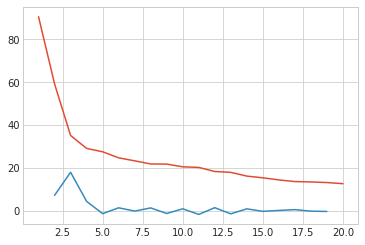

clusters: 3


In [127]:
last = Z[-20:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

Elbow represented on the blue line corresponds to the maximum acceleration of distance growth (acceleration plotted by the green line) which then identifies the number of clusters in 3.

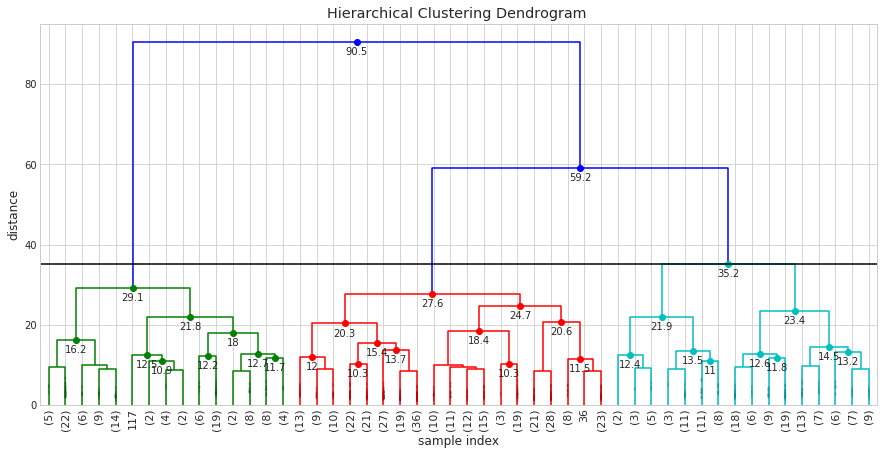

In [128]:

#D = df_features.values

Z = linkage(D, method='ward', metric='euclidean') #Perform hierarchical/agglomerative clustering. ward = Similarity of two clusters is based on the increase in squared error when two clusters are merged

max_d =35.2 #The common practice to flatten dendrograms in $k$ clusters is to cut them off at constant height $k-1$. 
plt.figure(figsize=(15, 7))
fancy_dendrogram(
    Z,
    
    leaf_rotation=90.,
    leaf_font_size=11.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
    color_threshold=max_d,
    max_d = max_d,
    distance_sort='descending',
    truncate_mode = 'lastp',
      p=50
)

plt.show()

In [129]:
k=3
clusters = fcluster(Z, k, criterion='maxclust')
contr, err,centers = getCenter(Y,clusters)
print('centroid: ',centers,'\t %items ',contr)

centroid:  [504, 70, 41] 	 %items  [20.11, 55.3, 24.6]


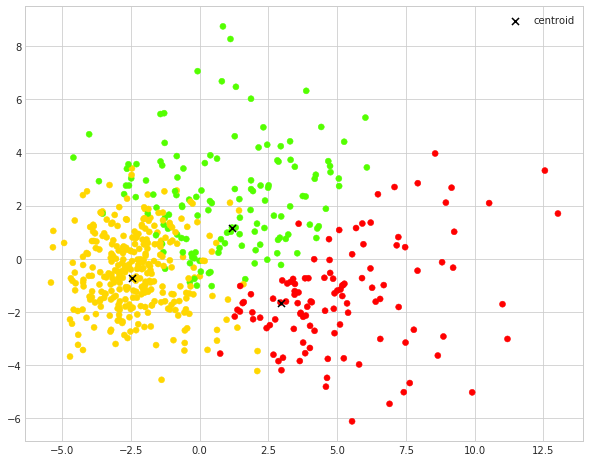

In [130]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.scatter([X[504,0], X[70,0],X[41,0]],[X[504,1], X[70,1],X[41,1]], c='black', cmap='prism',marker='x',s=50,
            label="centroid")  # plot points with cluster dependent colors


plt.legend()

plt.show()

## K Meas

k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 

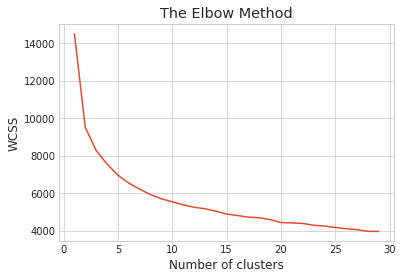

In [131]:
D = df_features.values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(D)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Silhouette analysis
Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.


http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

e next question is “how many principal components are we going to choose for our new feature subspace?” 
A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues.
The explained variance tells us how much information (variance) can be attributed to each of the principal components.
For n_clusters = 2 The average silhouette_score is : 0.34650902826344726


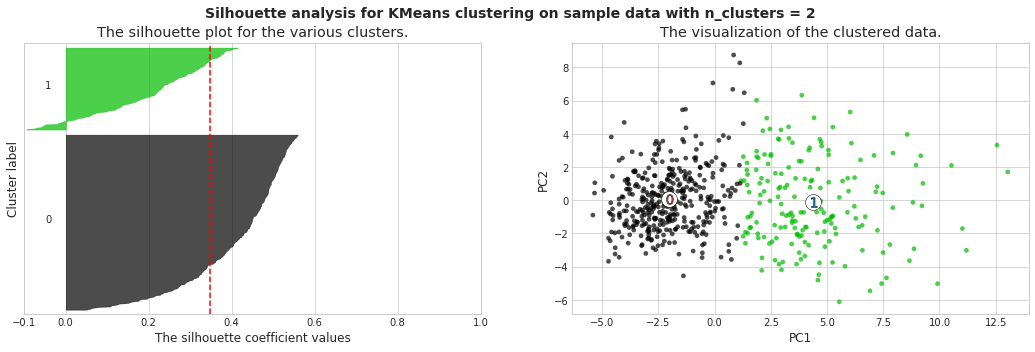

For n_clusters = 3 The average silhouette_score is : 0.2851057538565401


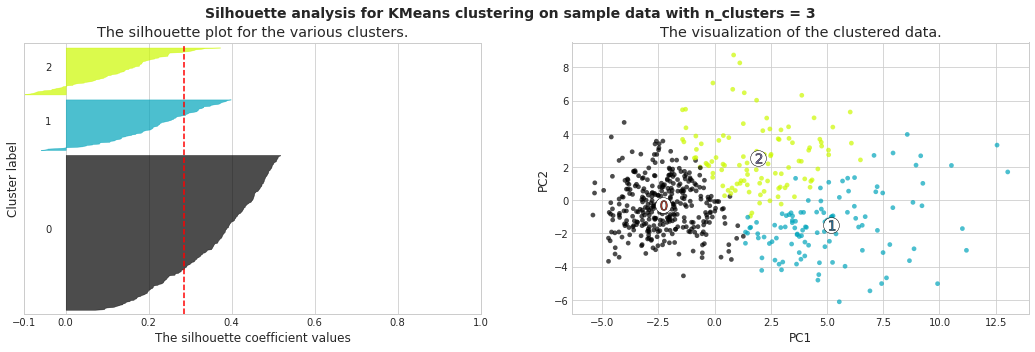

For n_clusters = 4 The average silhouette_score is : 0.16574353756903032


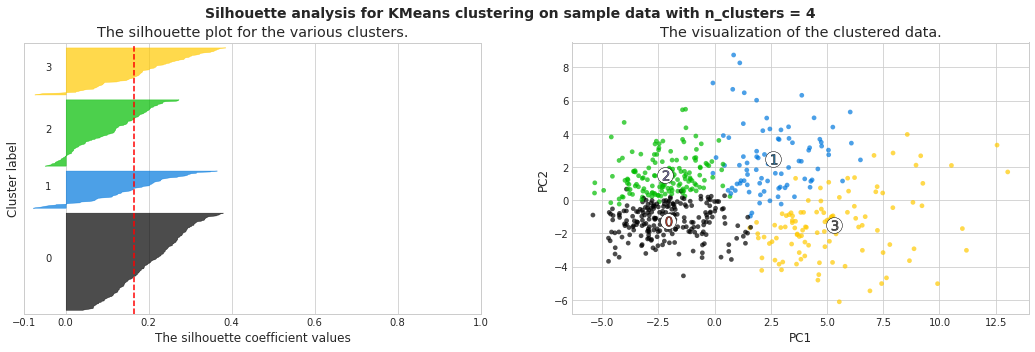

For n_clusters = 5 The average silhouette_score is : 0.18209654856627094


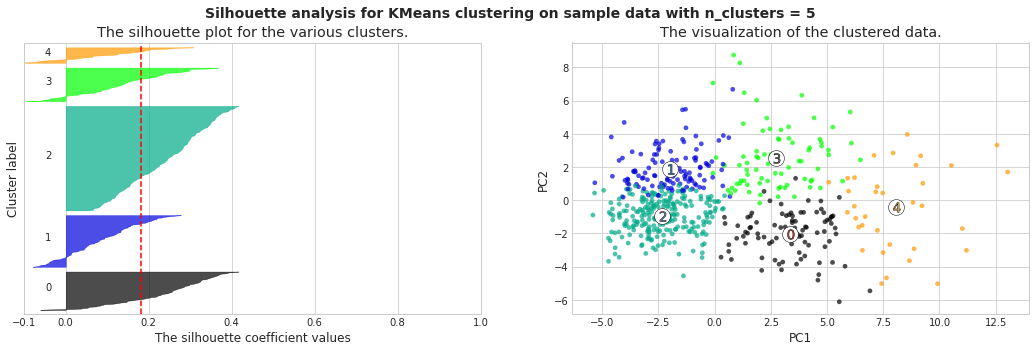

For n_clusters = 6 The average silhouette_score is : 0.15409280526964142


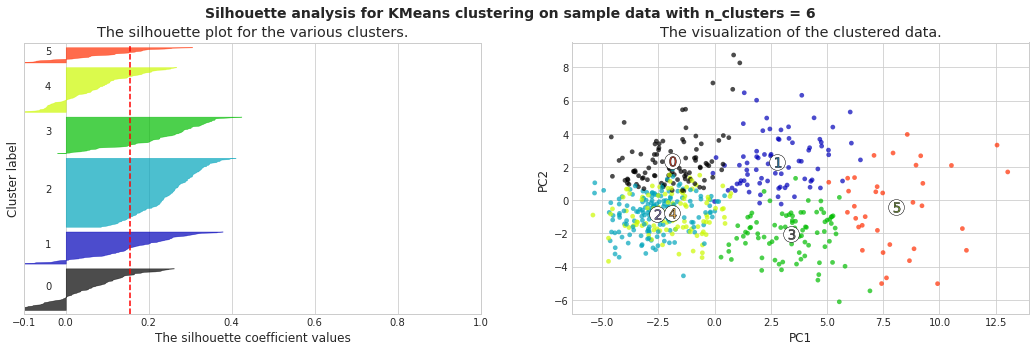

In [132]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = df_features.values

range_n_clusters = [2, 3, 4, 5, 6]

pca_2d = PCA(n_components=2)
pca_2d_r = pca_2d.fit_transform(X)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, max_iter=9000)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
 
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_2d_r[:, 0], pca_2d_r[:, 1], marker='.', s=90, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    centers = pca_2d.transform(centers)
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=250, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=100, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In our example, the analysis of the silhouette is used to choose an optimal value for the number of clusters. The silhouette plot shows that a n_clusters value of 5 and 6 is not good because they have clusters with lower than average scores, many negative values and also large fluctuations in the size of the silhouette plot. From the analysis of the silhouette, a good number of k clusters appears to be 2, 3 or 4, since it confirms what has already been expressed by the elbow method applied to hierarchical clustering.